In [155]:
import re
import string

import nltk
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from pylab import rcParams
from spellchecker import SpellChecker
from wordcloud import STOPWORDS

nltk.download('punkt')
plt.style.use('dark_background')
rcParams['figure.figsize'] = 20, 12

[nltk_data] Downloading package punkt to /Users/amaity2/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
df_train = pd.read_csv('../input/nlp-getting-started/train.csv')
print(df_train.shape)
df_train.head()

(7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [11]:
df_test = pd.read_csv('../input/nlp-getting-started/test.csv')
print(df_test.shape)
df_test.head()

(3263, 4)


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Target

0    4342
1    3271
Name: target, dtype: int64


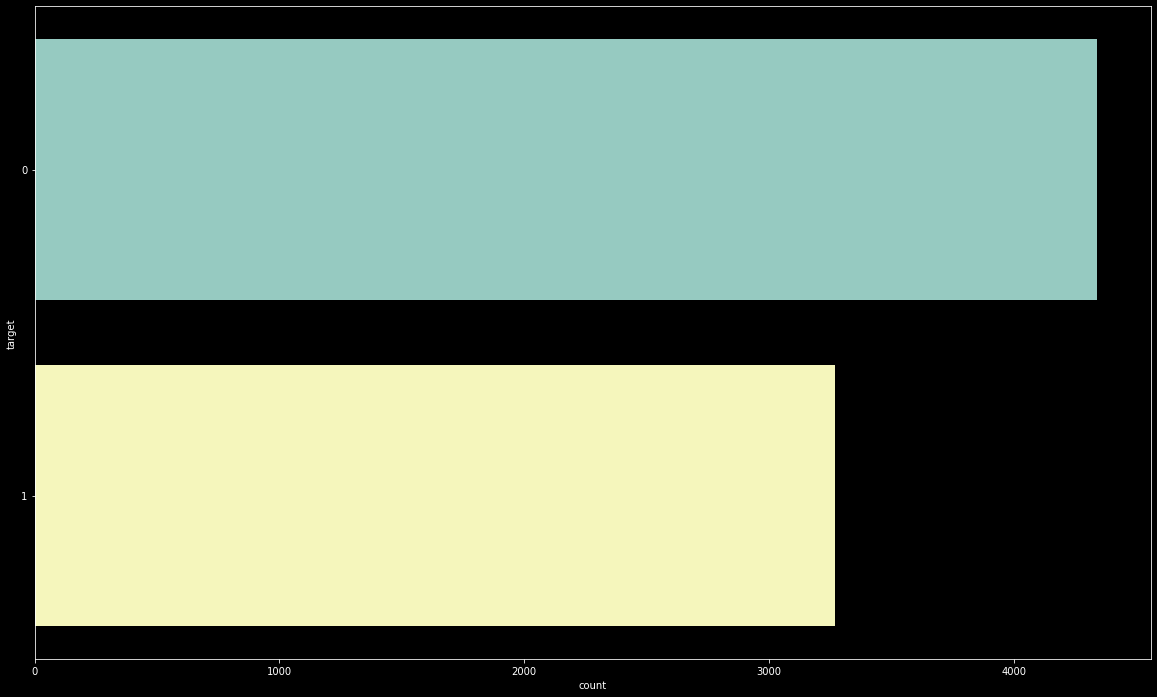

In [24]:
print(df_train['target'].value_counts())
sns.countplot(y=df_train['target'])

## Keyword

In [31]:
df_train[df_train['keyword'].notnull()]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7578,10830,wrecked,NaN,@jt_ruff23 @cameronhacker and I wrecked you both,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0


In [32]:
df_train[df_train['keyword'].isnull()]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [63]:
f'{len(df_train[df_train["keyword"].isnull()]) * 100 / len(df_train)}% keywords are null in train'

'0.8012610009194798% keywords are null in train'

In [65]:
f'{len(df_test[df_test["keyword"].isnull()]) * 100 / len(df_test)}% keywords are null in test'

'0.796812749003984% keywords are null in test'

In [66]:
df_train.loc[df_train['keyword'].isnull(), 'keyword'] = 'no%20keyword'
df_test.loc[df_test['keyword'].isnull(), 'keyword'] = 'no%20keyword'

no%20keyword             61
fatalities               45
armageddon               42
deluge                   42
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64


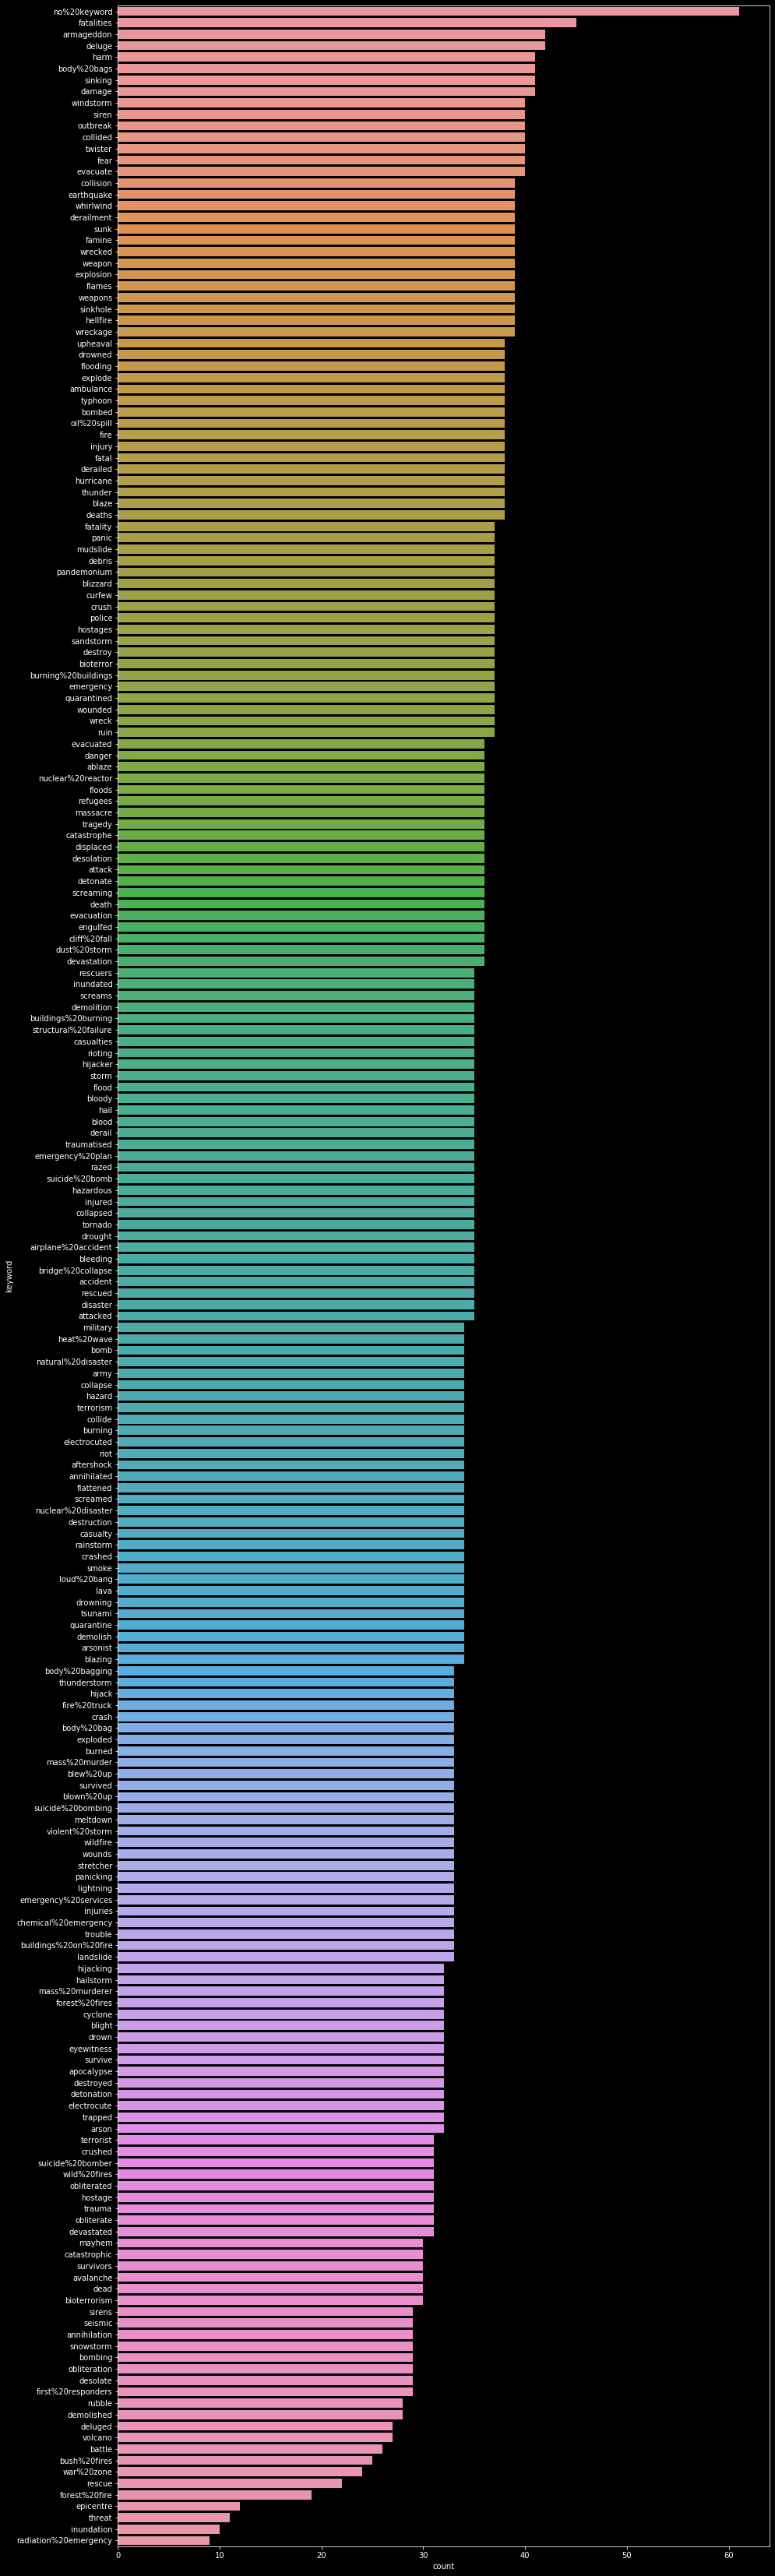

In [35]:
print(df_train['keyword'].value_counts())
plt.figure(figsize=(15, 60))
sns.countplot(y=df_train['keyword'], order=df_train['keyword'].value_counts().index)

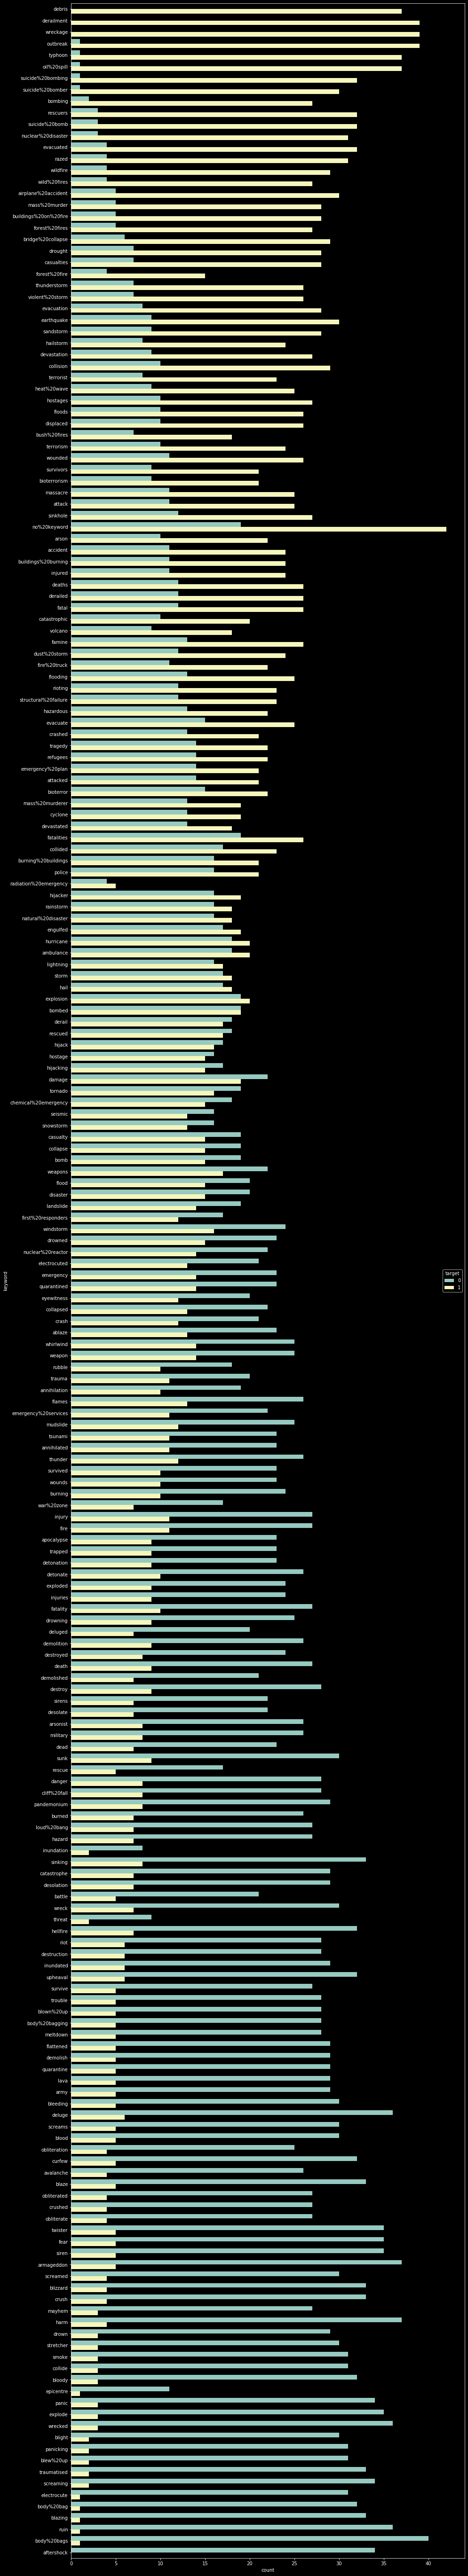

In [55]:
df_train['target_mean'] = df_train.groupby('keyword')['target'].transform('mean')
plt.figure(figsize=(15, 100))
sns.countplot(y=df_train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df_train.sort_values(by='target_mean', ascending=False)['target'])

In [69]:
df_train.drop('target_mean', axis=1, inplace=True)

## Location

In [70]:
df_train[df_train['location'].notnull()]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0


In [71]:
df_train[df_train['location'].isnull()]

,id,keyword,location,text,target
0,1,no%20keyword,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,no%20keyword,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,no%20keyword,NaN,All residents asked to 'shelter in place' are ...,1
3,6,no%20keyword,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,no%20keyword,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,no%20keyword,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,no%20keyword,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,no%20keyword,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,no%20keyword,NaN,Police investigating after an e-bike collided ...,1


In [72]:
f'{len(df_train[df_train["location"].isnull()]) * 100 / len(df_train)}% keywords are null in train'

'33.27203467752528% keywords are null in train'

In [74]:
f'{len(df_test[df_test["location"].isnull()]) * 100 / len(df_test)}% keywords are null in train'

'33.864541832669325% keywords are null in train'

In [75]:
df_train.loc[df_train['location'].isnull(), 'location'] = 'no%20location'
df_test.loc[df_test['location'].isnull(), 'location'] = 'no%20location'

In [77]:
print(df_train['location'].value_counts())
# plt.figure(figsize=(15, 60))
# sns.countplot(y=df_train['location'], order=df_train['location'].value_counts().index)

no%20location           2533
USA                      104
New York                  71
United States             50
London                    45
                        ... 
The Internetz              1
Santa Monica, CA           1
North Port, FL             1
Kaneohe                    1
St Austell, Cornwall       1
Name: location, Length: 3342, dtype: int64


## Extra Features

In [78]:
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(str(x).split()))
df_train.head(10)

,id,keyword,location,text,target,word_count
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,no%20keyword,no%20location,Forest fire near La Ronge Sask. Canada,1,7
2,5,no%20keyword,no%20location,All residents asked to 'shelter in place' are ...,1,22
3,6,no%20keyword,no%20location,"13,000 people receive #wildfires evacuation or...",1,8
4,7,no%20keyword,no%20location,Just got sent this photo from Ruby #Alaska as ...,1,16
5,8,no%20keyword,no%20location,#RockyFire Update => California Hwy. 20 closed...,1,18
6,10,no%20keyword,no%20location,#flood #disaster Heavy rain causes flash flood...,1,14
7,13,no%20keyword,no%20location,I'm on top of the hill and I can see a fire in...,1,15
8,14,no%20keyword,no%20location,There's an emergency evacuation happening now ...,1,12
9,15,no%20keyword,no%20location,I'm afraid that the tornado is coming to our a...,1,10


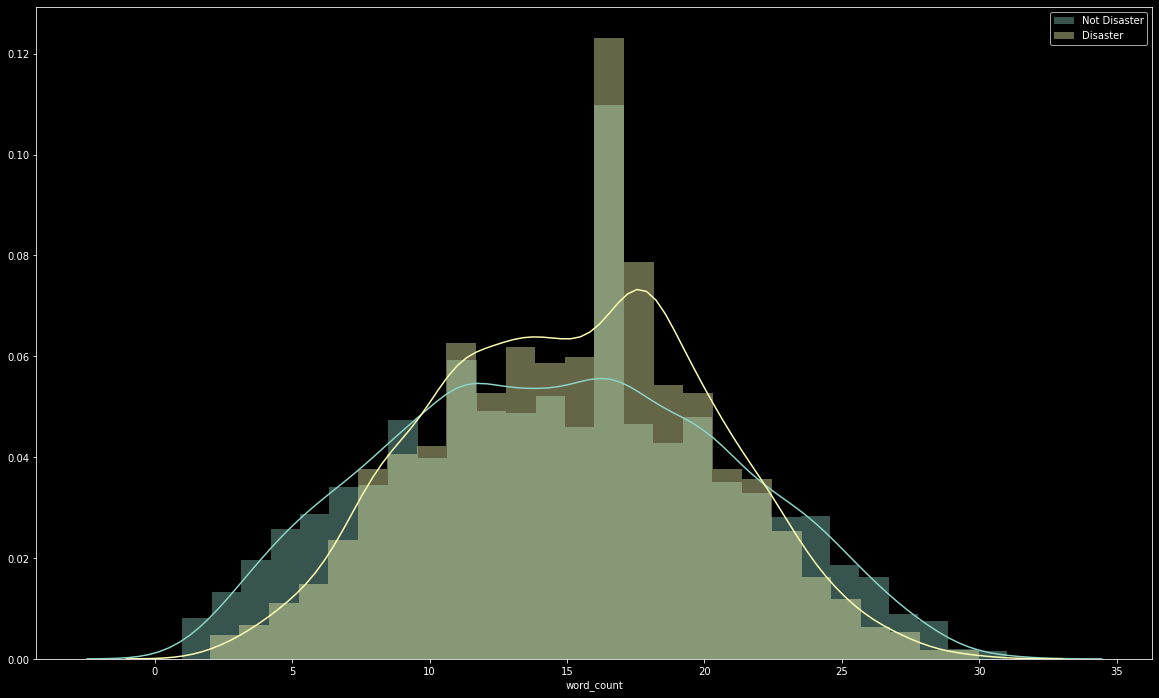

In [88]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train.loc[df_train['target'] == 0]['word_count'], label='Not Disaster', ax=ax)
sns.distplot(df_train.loc[df_train['target'] == 1]['word_count'], label='Disaster', ax=ax)
ax.legend()

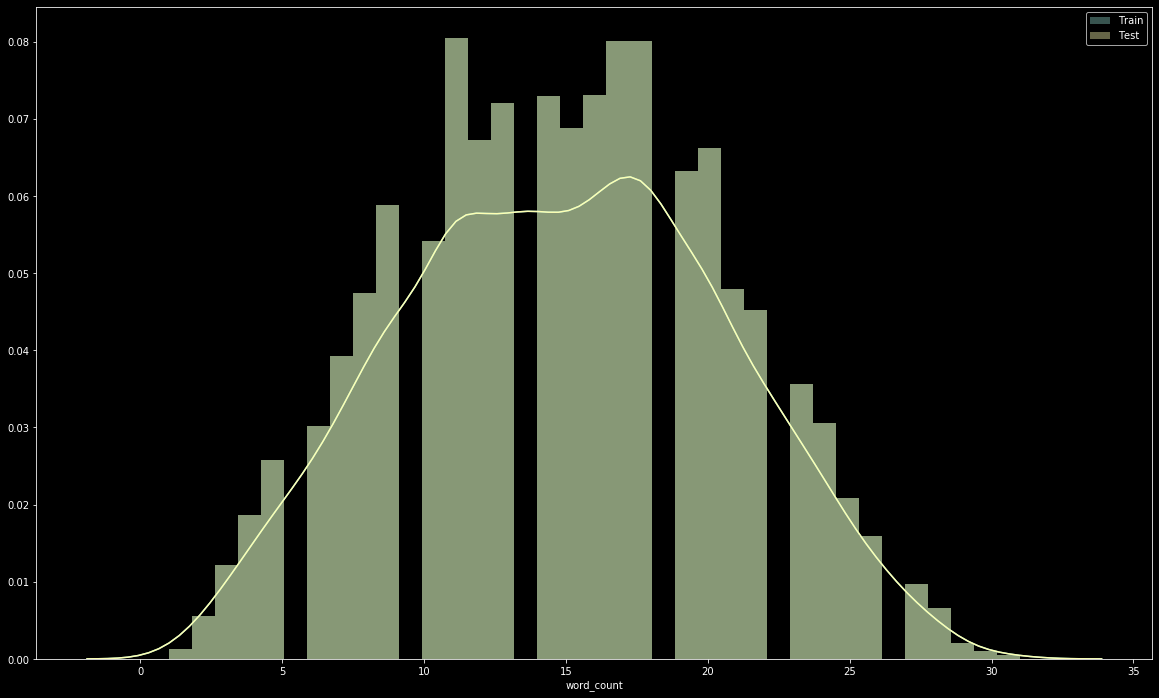

In [89]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train['word_count'], label='Train', ax=ax)
sns.distplot(df_train['word_count'], label='Test', ax=ax)
ax.legend()

In [90]:
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
df_test['unique_word_count'] = df_test['text'].apply(lambda x: len(set(str(x).split())))
df_train.head(10)

,id,keyword,location,text,target,word_count,unique_word_count
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13,13
1,4,no%20keyword,no%20location,Forest fire near La Ronge Sask. Canada,1,7,7
2,5,no%20keyword,no%20location,All residents asked to 'shelter in place' are ...,1,22,20
3,6,no%20keyword,no%20location,"13,000 people receive #wildfires evacuation or...",1,8,8
4,7,no%20keyword,no%20location,Just got sent this photo from Ruby #Alaska as ...,1,16,15
5,8,no%20keyword,no%20location,#RockyFire Update => California Hwy. 20 closed...,1,18,18
6,10,no%20keyword,no%20location,#flood #disaster Heavy rain causes flash flood...,1,14,14
7,13,no%20keyword,no%20location,I'm on top of the hill and I can see a fire in...,1,15,14
8,14,no%20keyword,no%20location,There's an emergency evacuation happening now ...,1,12,11
9,15,no%20keyword,no%20location,I'm afraid that the tornado is coming to our a...,1,10,10


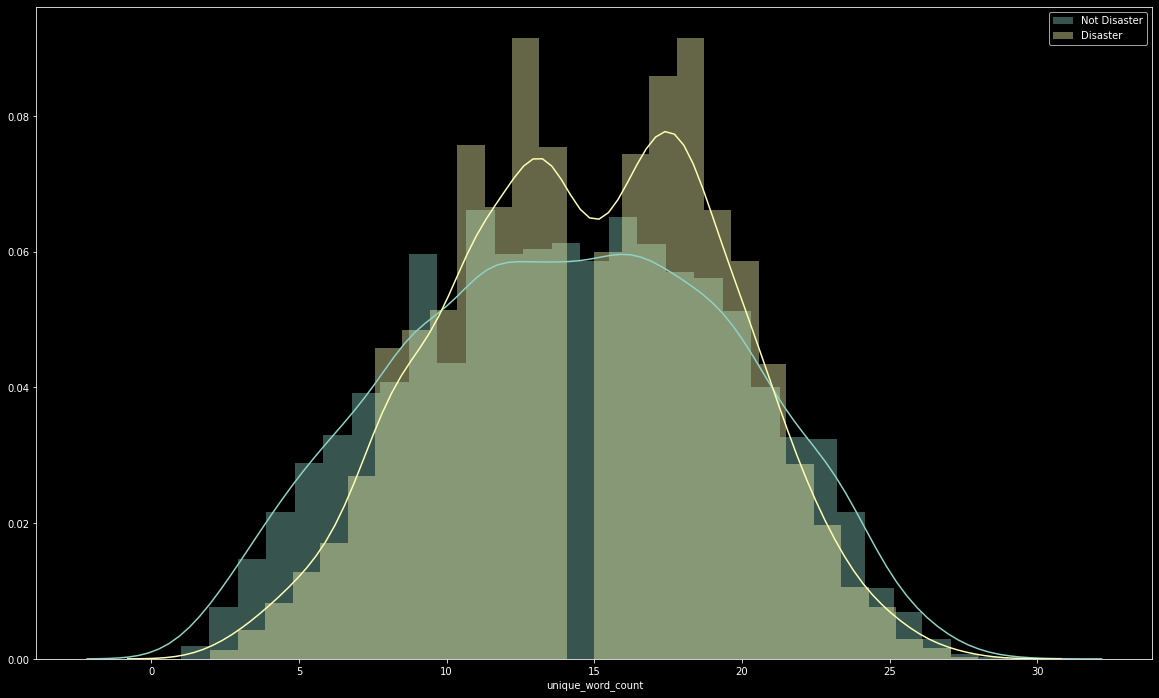

In [91]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train.loc[df_train['target'] == 0]['unique_word_count'], label='Not Disaster', ax=ax)
sns.distplot(df_train.loc[df_train['target'] == 1]['unique_word_count'], label='Disaster', ax=ax)
ax.legend()

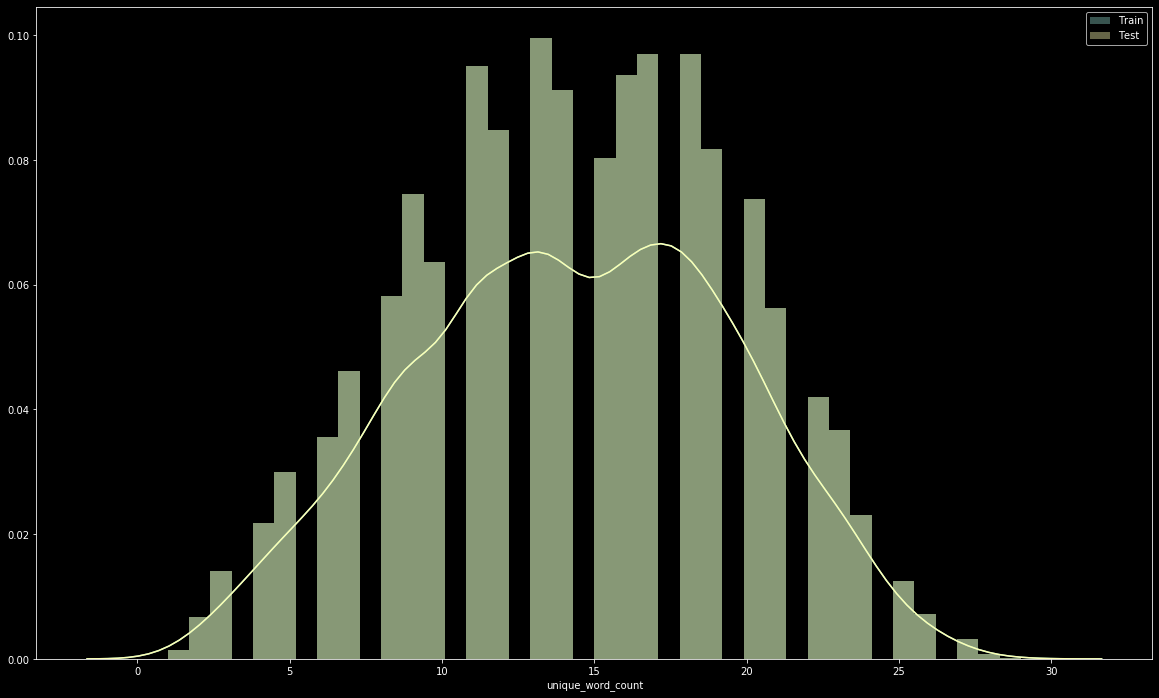

In [92]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train['unique_word_count'], label='Train', ax=ax)
sns.distplot(df_train['unique_word_count'], label='Test', ax=ax)
ax.legend()

In [95]:
df_train['stop_word_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df_test['stop_word_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df_train.head(10)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13,13,6
1,4,no%20keyword,no%20location,Forest fire near La Ronge Sask. Canada,1,7,7,0
2,5,no%20keyword,no%20location,All residents asked to 'shelter in place' are ...,1,22,20,11
3,6,no%20keyword,no%20location,"13,000 people receive #wildfires evacuation or...",1,8,8,1
4,7,no%20keyword,no%20location,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7
5,8,no%20keyword,no%20location,#RockyFire Update => California Hwy. 20 closed...,1,18,18,3
6,10,no%20keyword,no%20location,#flood #disaster Heavy rain causes flash flood...,1,14,14,2
7,13,no%20keyword,no%20location,I'm on top of the hill and I can see a fire in...,1,15,14,10
8,14,no%20keyword,no%20location,There's an emergency evacuation happening now ...,1,12,11,5
9,15,no%20keyword,no%20location,I'm afraid that the tornado is coming to our a...,1,10,10,6


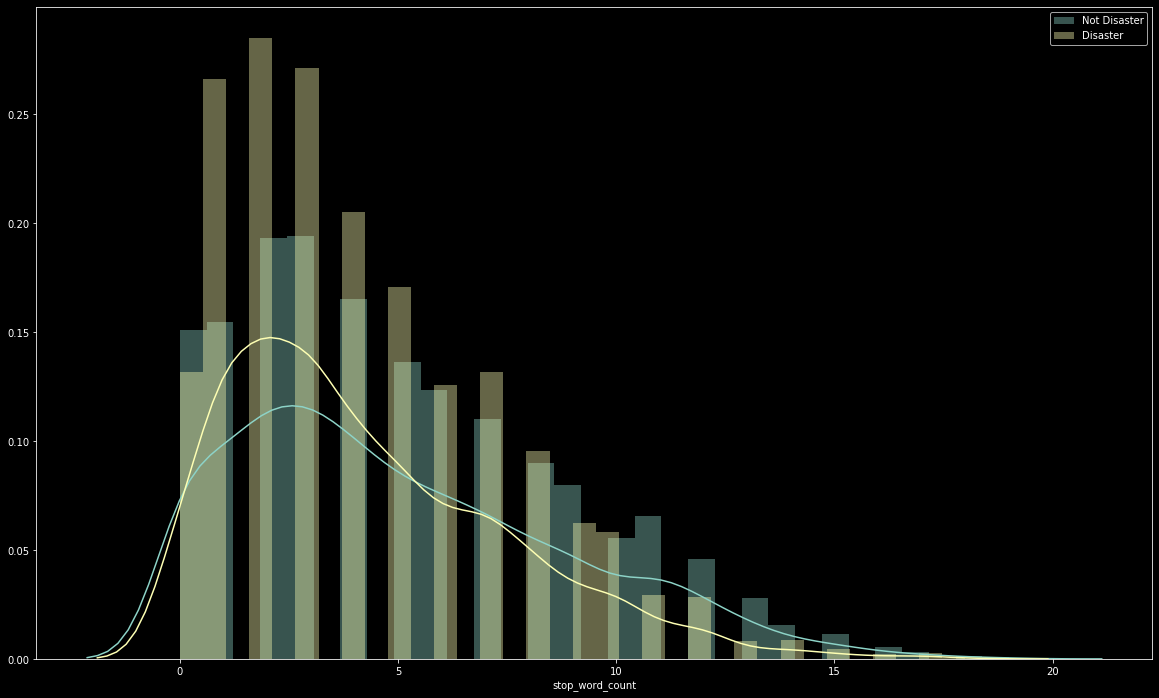

In [96]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train.loc[df_train['target'] == 0]['stop_word_count'], label='Not Disaster', ax=ax)
sns.distplot(df_train.loc[df_train['target'] == 1]['stop_word_count'], label='Disaster', ax=ax)
ax.legend()

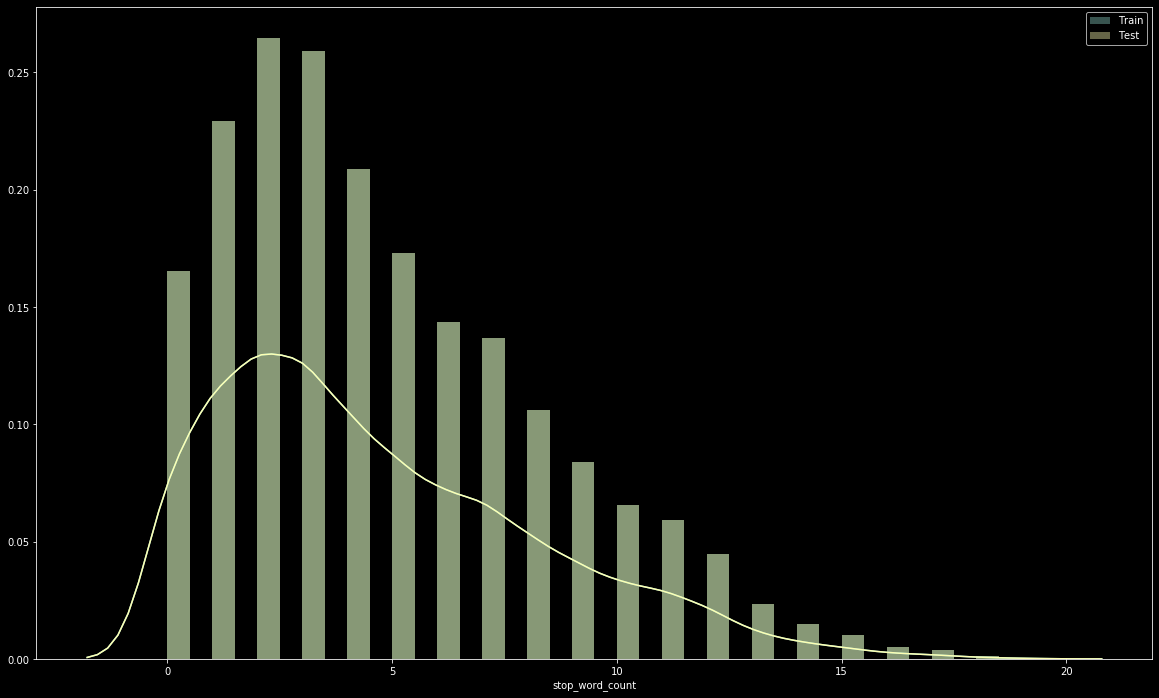

In [99]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train['stop_word_count'], label='Train', ax=ax)
sns.distplot(df_train['stop_word_count'], label='Test', ax=ax)
ax.legend()

In [100]:
df_train['non_stop_word_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w not in STOPWORDS]))
df_test['non_stop_word_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w not in STOPWORDS]))
df_train.head(10)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,non_stop_word_count
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,7
1,4,no%20keyword,no%20location,Forest fire near La Ronge Sask. Canada,1,7,7,0,7
2,5,no%20keyword,no%20location,All residents asked to 'shelter in place' are ...,1,22,20,11,11
3,6,no%20keyword,no%20location,"13,000 people receive #wildfires evacuation or...",1,8,8,1,7
4,7,no%20keyword,no%20location,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,9
5,8,no%20keyword,no%20location,#RockyFire Update => California Hwy. 20 closed...,1,18,18,3,15
6,10,no%20keyword,no%20location,#flood #disaster Heavy rain causes flash flood...,1,14,14,2,12
7,13,no%20keyword,no%20location,I'm on top of the hill and I can see a fire in...,1,15,14,10,5
8,14,no%20keyword,no%20location,There's an emergency evacuation happening now ...,1,12,11,5,7
9,15,no%20keyword,no%20location,I'm afraid that the tornado is coming to our a...,1,10,10,6,4


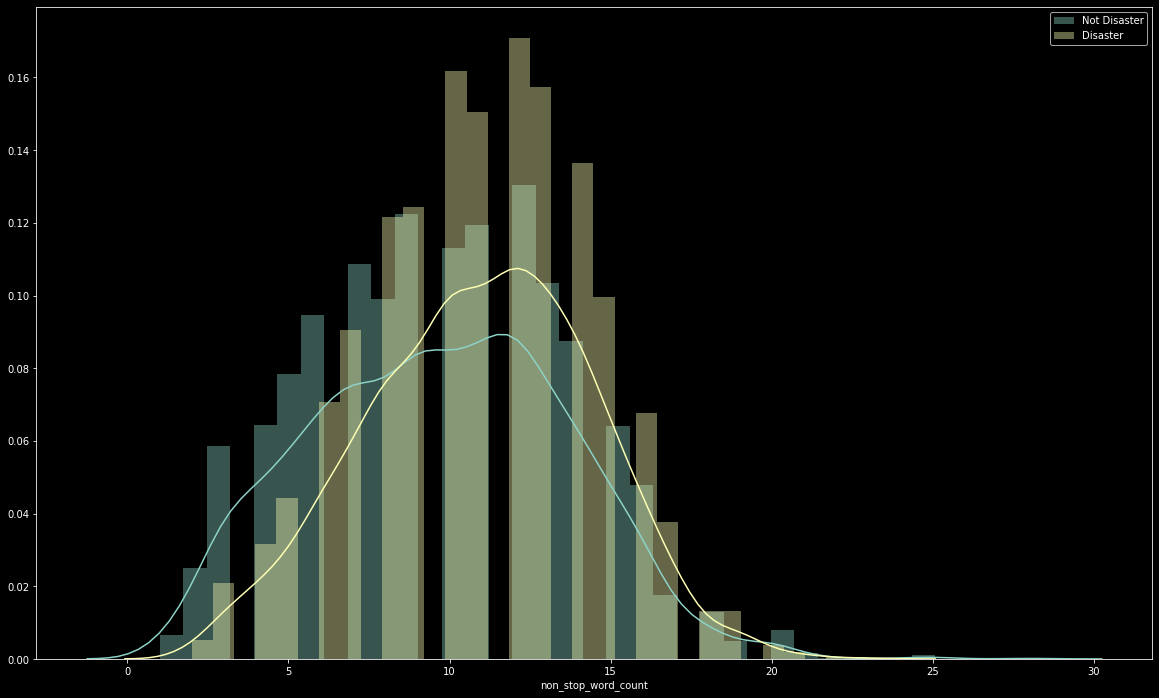

In [101]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train.loc[df_train['target'] == 0]['non_stop_word_count'], label='Not Disaster', ax=ax)
sns.distplot(df_train.loc[df_train['target'] == 1]['non_stop_word_count'], label='Disaster', ax=ax)
ax.legend()

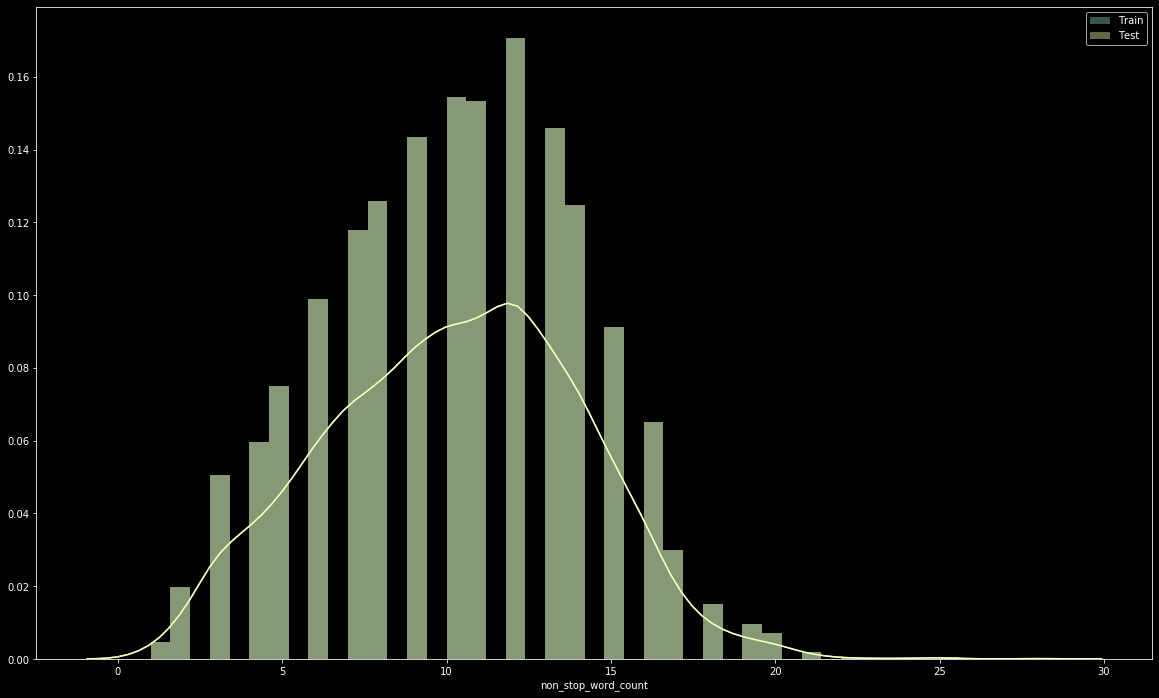

In [102]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train['non_stop_word_count'], label='Train', ax=ax)
sns.distplot(df_train['non_stop_word_count'], label='Test', ax=ax)
ax.legend()

In [103]:
df_train['url_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df_test['url_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df_train.head(10)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,non_stop_word_count,url_count
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,7,0
1,4,no%20keyword,no%20location,Forest fire near La Ronge Sask. Canada,1,7,7,0,7,0
2,5,no%20keyword,no%20location,All residents asked to 'shelter in place' are ...,1,22,20,11,11,0
3,6,no%20keyword,no%20location,"13,000 people receive #wildfires evacuation or...",1,8,8,1,7,0
4,7,no%20keyword,no%20location,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,9,0
5,8,no%20keyword,no%20location,#RockyFire Update => California Hwy. 20 closed...,1,18,18,3,15,0
6,10,no%20keyword,no%20location,#flood #disaster Heavy rain causes flash flood...,1,14,14,2,12,0
7,13,no%20keyword,no%20location,I'm on top of the hill and I can see a fire in...,1,15,14,10,5,0
8,14,no%20keyword,no%20location,There's an emergency evacuation happening now ...,1,12,11,5,7,0
9,15,no%20keyword,no%20location,I'm afraid that the tornado is coming to our a...,1,10,10,6,4,0


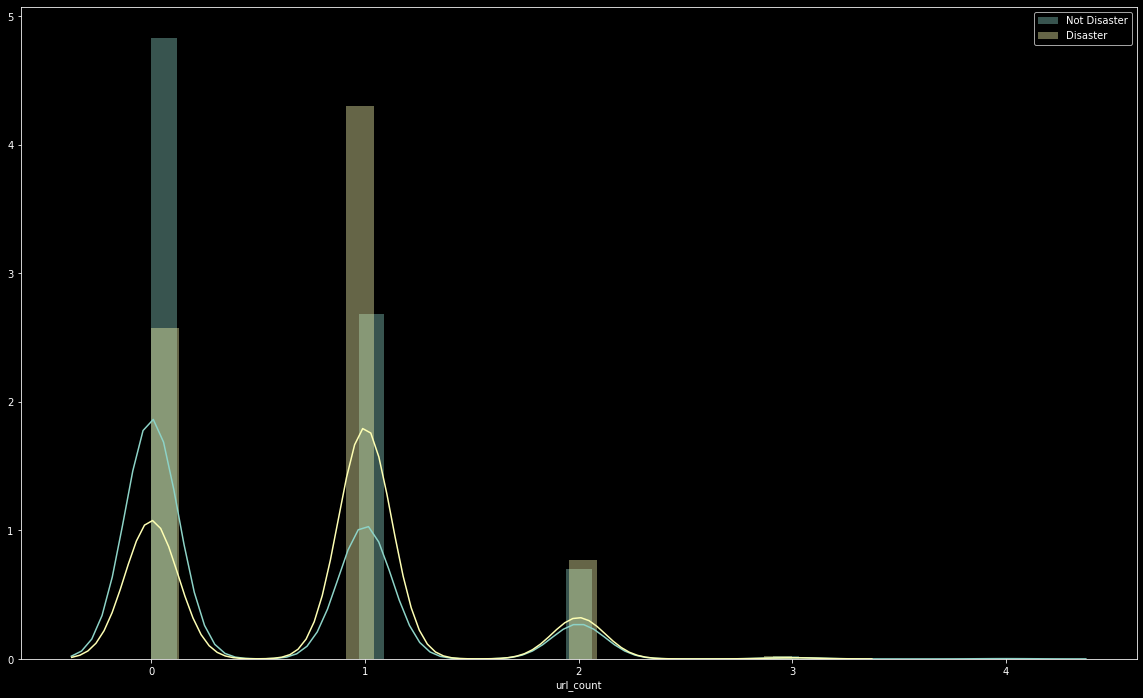

In [104]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train.loc[df_train['target'] == 0]['url_count'], label='Not Disaster', ax=ax)
sns.distplot(df_train.loc[df_train['target'] == 1]['url_count'], label='Disaster', ax=ax)
ax.legend()

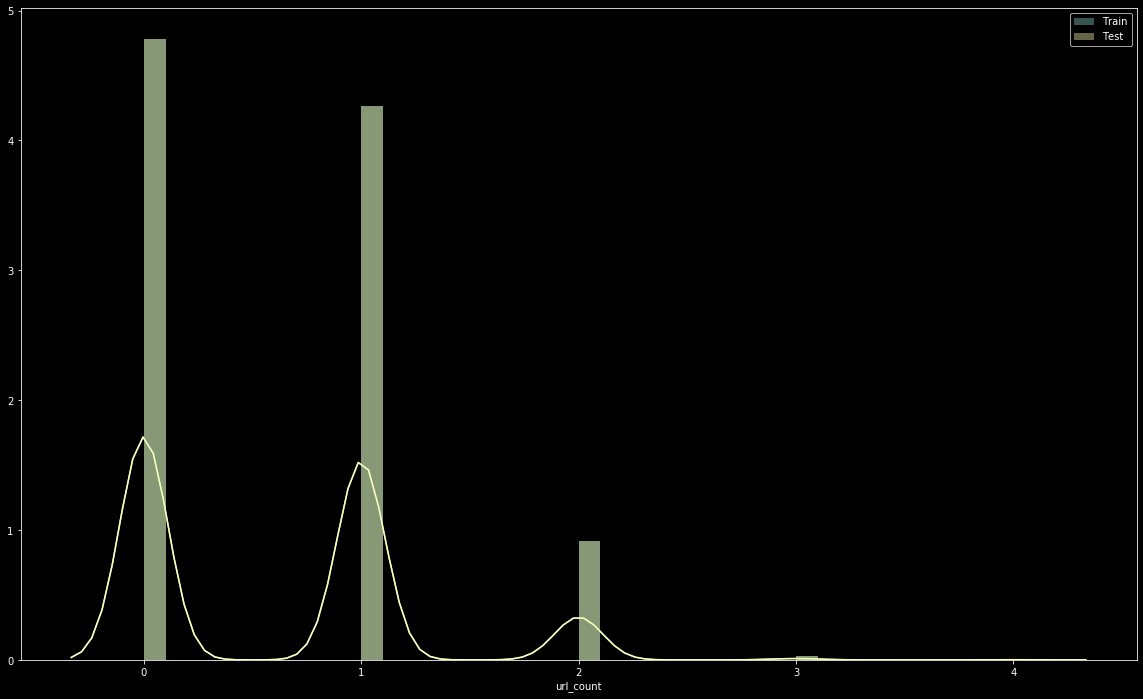

In [105]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train['url_count'], label='Train', ax=ax)
sns.distplot(df_train['url_count'], label='Test', ax=ax)
ax.legend()

In [106]:
df_train['hashtag_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_test['hashtag_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_train.head(10)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,non_stop_word_count,url_count,hashtag_count
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,7,0,1
1,4,no%20keyword,no%20location,Forest fire near La Ronge Sask. Canada,1,7,7,0,7,0,0
2,5,no%20keyword,no%20location,All residents asked to 'shelter in place' are ...,1,22,20,11,11,0,0
3,6,no%20keyword,no%20location,"13,000 people receive #wildfires evacuation or...",1,8,8,1,7,0,1
4,7,no%20keyword,no%20location,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,9,0,2
5,8,no%20keyword,no%20location,#RockyFire Update => California Hwy. 20 closed...,1,18,18,3,15,0,3
6,10,no%20keyword,no%20location,#flood #disaster Heavy rain causes flash flood...,1,14,14,2,12,0,2
7,13,no%20keyword,no%20location,I'm on top of the hill and I can see a fire in...,1,15,14,10,5,0,0
8,14,no%20keyword,no%20location,There's an emergency evacuation happening now ...,1,12,11,5,7,0,0
9,15,no%20keyword,no%20location,I'm afraid that the tornado is coming to our a...,1,10,10,6,4,0,0


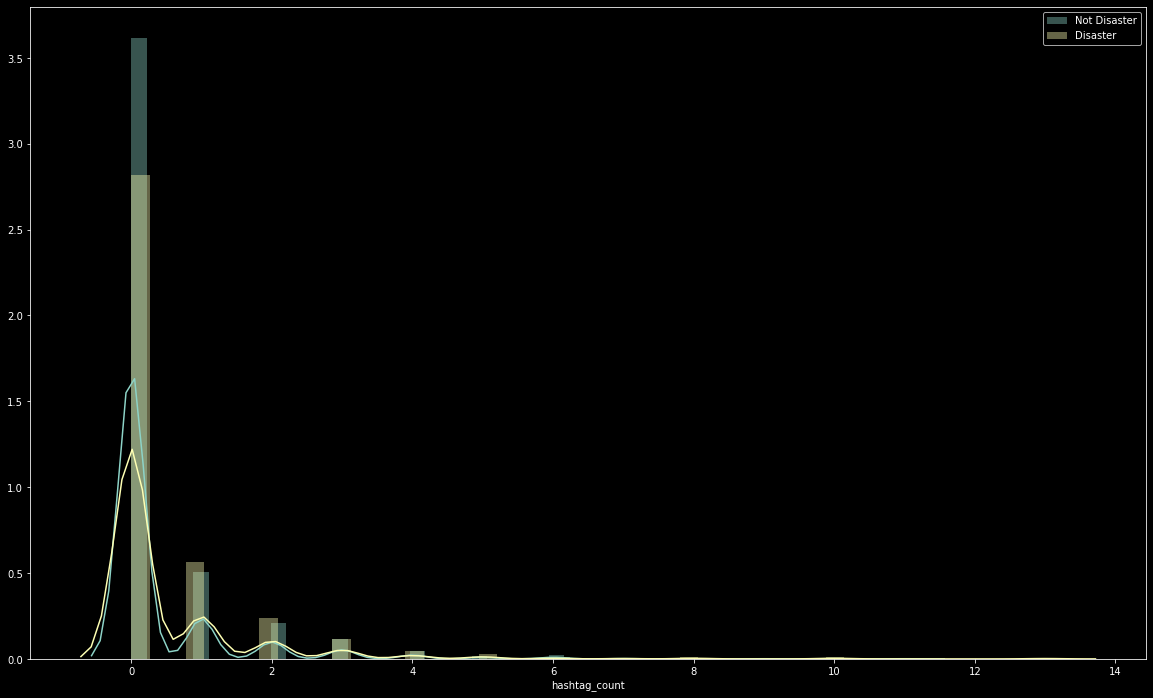

In [107]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train.loc[df_train['target'] == 0]['hashtag_count'], label='Not Disaster', ax=ax)
sns.distplot(df_train.loc[df_train['target'] == 1]['hashtag_count'], label='Disaster', ax=ax)
ax.legend()

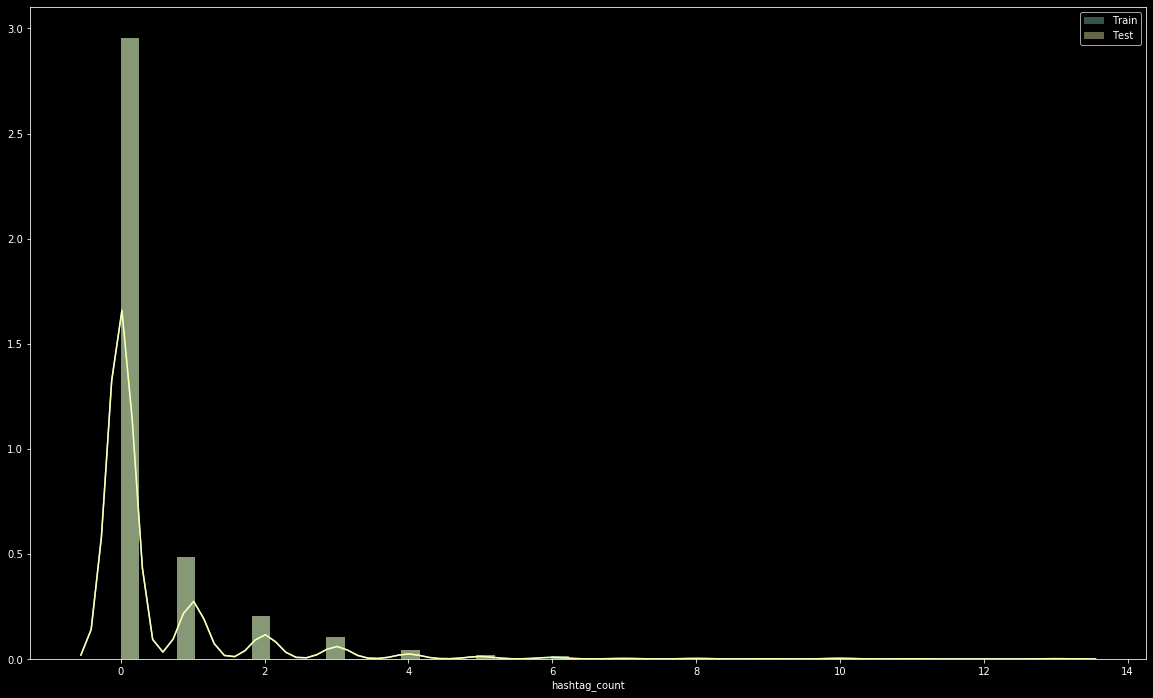

In [108]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train['hashtag_count'], label='Train', ax=ax)
sns.distplot(df_train['hashtag_count'], label='Test', ax=ax)
ax.legend()

In [109]:
df_train['mention_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
df_test['mention_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
df_train.head(10)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,non_stop_word_count,url_count,hashtag_count,mention_count
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,7,0,1,0
1,4,no%20keyword,no%20location,Forest fire near La Ronge Sask. Canada,1,7,7,0,7,0,0,0
2,5,no%20keyword,no%20location,All residents asked to 'shelter in place' are ...,1,22,20,11,11,0,0,0
3,6,no%20keyword,no%20location,"13,000 people receive #wildfires evacuation or...",1,8,8,1,7,0,1,0
4,7,no%20keyword,no%20location,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,9,0,2,0
5,8,no%20keyword,no%20location,#RockyFire Update => California Hwy. 20 closed...,1,18,18,3,15,0,3,0
6,10,no%20keyword,no%20location,#flood #disaster Heavy rain causes flash flood...,1,14,14,2,12,0,2,0
7,13,no%20keyword,no%20location,I'm on top of the hill and I can see a fire in...,1,15,14,10,5,0,0,0
8,14,no%20keyword,no%20location,There's an emergency evacuation happening now ...,1,12,11,5,7,0,0,0
9,15,no%20keyword,no%20location,I'm afraid that the tornado is coming to our a...,1,10,10,6,4,0,0,0


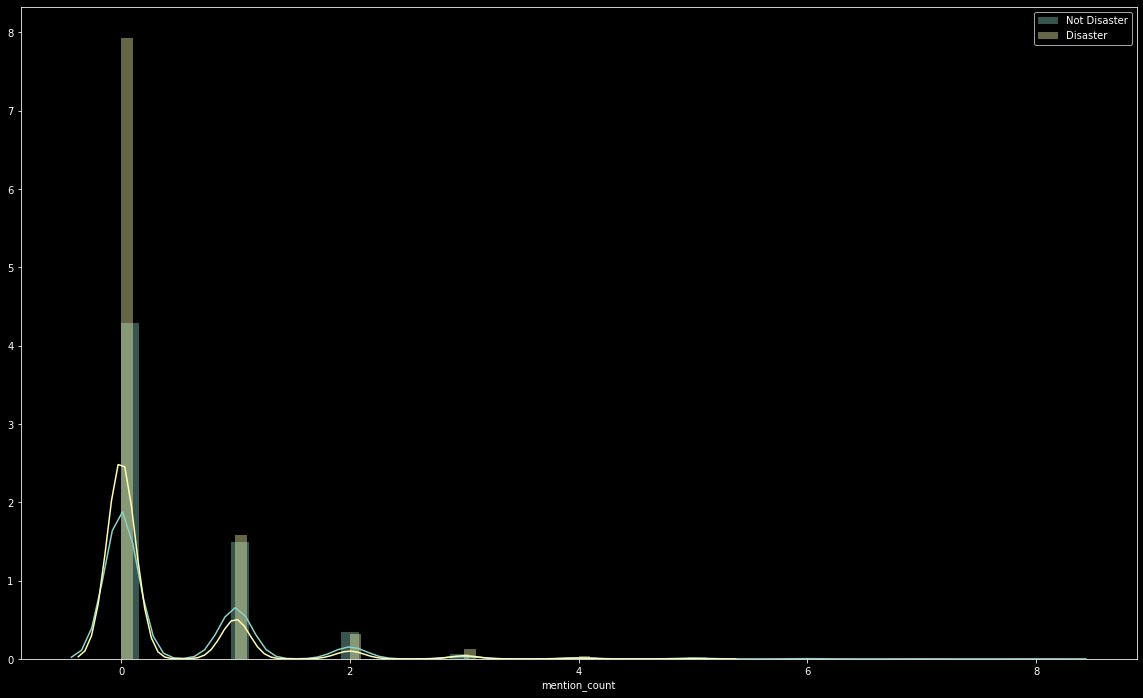

In [110]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train.loc[df_train['target'] == 0]['mention_count'], label='Not Disaster', ax=ax)
sns.distplot(df_train.loc[df_train['target'] == 1]['mention_count'], label='Disaster', ax=ax)
ax.legend()

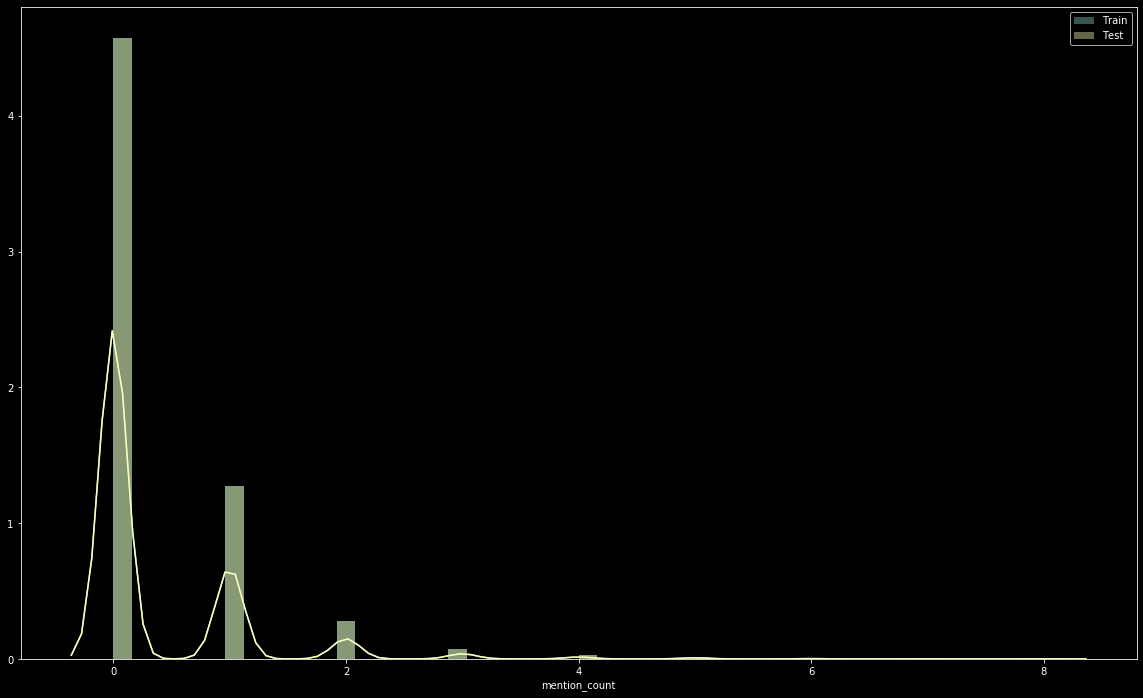

In [111]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train['mention_count'], label='Train', ax=ax)
sns.distplot(df_train['mention_count'], label='Test', ax=ax)
ax.legend()

In [112]:
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['text'].apply(lambda x: len(str(x)))
df_train.head(10)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,non_stop_word_count,url_count,hashtag_count,mention_count,char_count
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,7,0,1,0,69
1,4,no%20keyword,no%20location,Forest fire near La Ronge Sask. Canada,1,7,7,0,7,0,0,0,38
2,5,no%20keyword,no%20location,All residents asked to 'shelter in place' are ...,1,22,20,11,11,0,0,0,133
3,6,no%20keyword,no%20location,"13,000 people receive #wildfires evacuation or...",1,8,8,1,7,0,1,0,65
4,7,no%20keyword,no%20location,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,9,0,2,0,88
5,8,no%20keyword,no%20location,#RockyFire Update => California Hwy. 20 closed...,1,18,18,3,15,0,3,0,110
6,10,no%20keyword,no%20location,#flood #disaster Heavy rain causes flash flood...,1,14,14,2,12,0,2,0,95
7,13,no%20keyword,no%20location,I'm on top of the hill and I can see a fire in...,1,15,14,10,5,0,0,0,59
8,14,no%20keyword,no%20location,There's an emergency evacuation happening now ...,1,12,11,5,7,0,0,0,79
9,15,no%20keyword,no%20location,I'm afraid that the tornado is coming to our a...,1,10,10,6,4,0,0,0,52


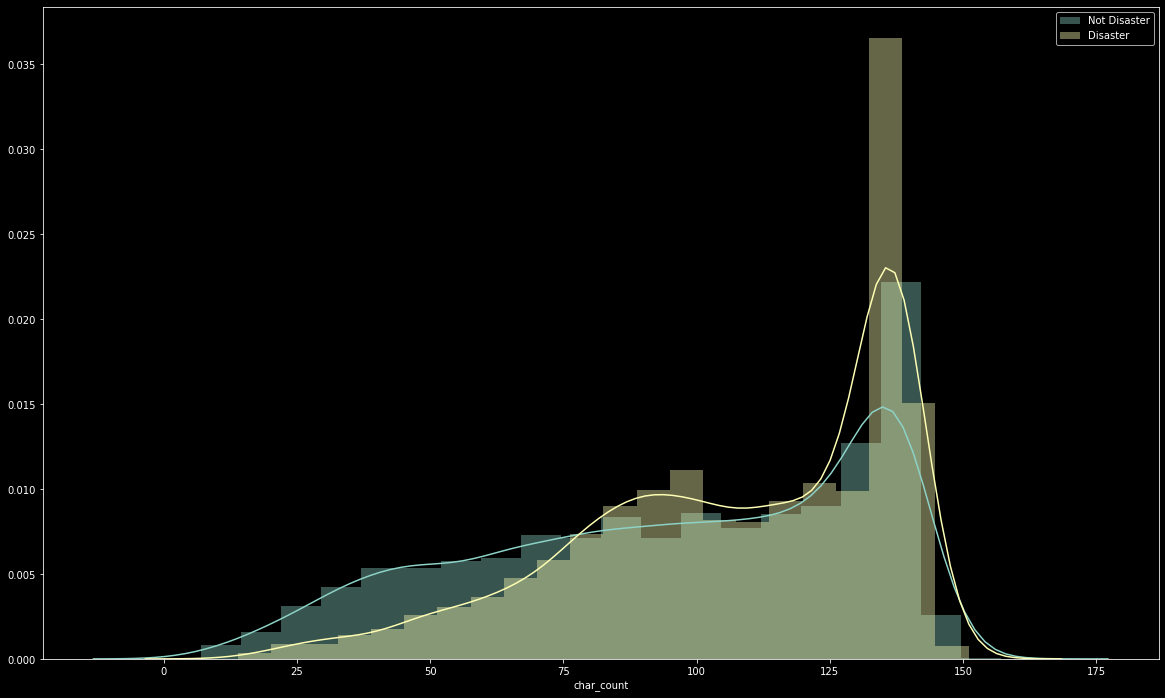

In [113]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train.loc[df_train['target'] == 0]['char_count'], label='Not Disaster', ax=ax)
sns.distplot(df_train.loc[df_train['target'] == 1]['char_count'], label='Disaster', ax=ax)
ax.legend()

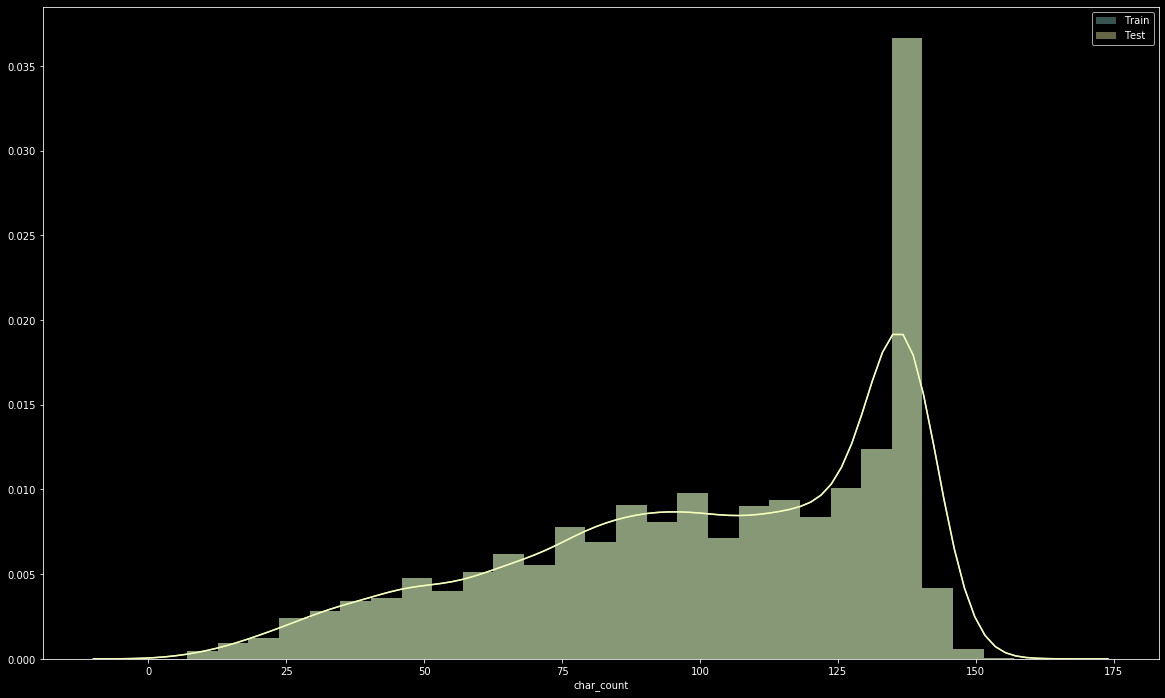

In [114]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train['char_count'], label='Train', ax=ax)
sns.distplot(df_train['char_count'], label='Test', ax=ax)
ax.legend()

In [118]:
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test['punctuation_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_train.head(10)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,non_stop_word_count,url_count,hashtag_count,mention_count,char_count,punctuation_count
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,7,0,1,0,69,1
1,4,no%20keyword,no%20location,Forest fire near La Ronge Sask. Canada,1,7,7,0,7,0,0,0,38,1
2,5,no%20keyword,no%20location,All residents asked to 'shelter in place' are ...,1,22,20,11,11,0,0,0,133,3
3,6,no%20keyword,no%20location,"13,000 people receive #wildfires evacuation or...",1,8,8,1,7,0,1,0,65,2
4,7,no%20keyword,no%20location,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,9,0,2,0,88,2
5,8,no%20keyword,no%20location,#RockyFire Update => California Hwy. 20 closed...,1,18,18,3,15,0,3,0,110,7
6,10,no%20keyword,no%20location,#flood #disaster Heavy rain causes flash flood...,1,14,14,2,12,0,2,0,95,3
7,13,no%20keyword,no%20location,I'm on top of the hill and I can see a fire in...,1,15,14,10,5,0,0,0,59,4
8,14,no%20keyword,no%20location,There's an emergency evacuation happening now ...,1,12,11,5,7,0,0,0,79,1
9,15,no%20keyword,no%20location,I'm afraid that the tornado is coming to our a...,1,10,10,6,4,0,0,0,52,4


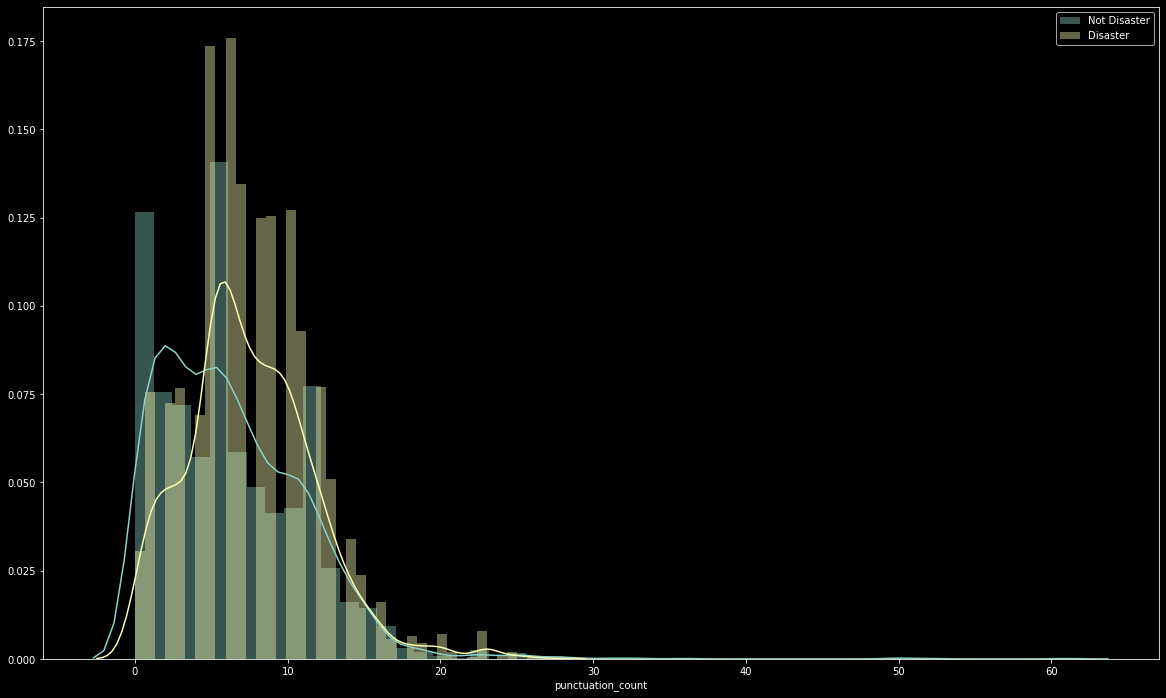

In [119]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train.loc[df_train['target'] == 0]['punctuation_count'], label='Not Disaster', ax=ax)
sns.distplot(df_train.loc[df_train['target'] == 1]['punctuation_count'], label='Disaster', ax=ax)
ax.legend()

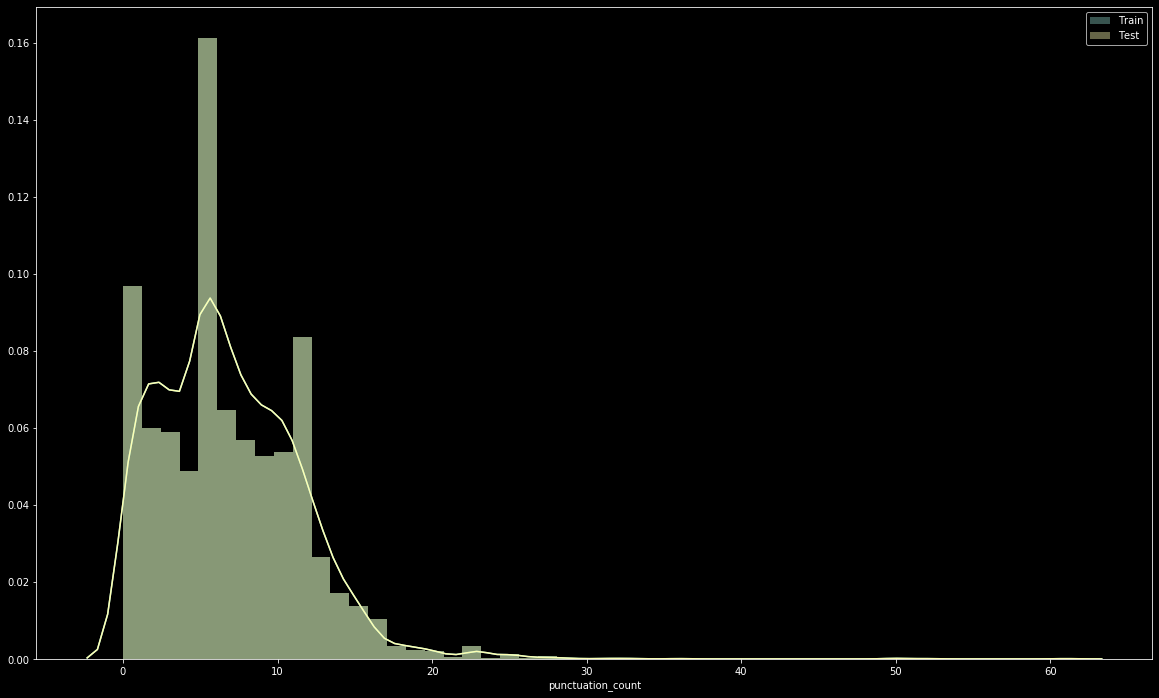

In [120]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train['punctuation_count'], label='Train', ax=ax)
sns.distplot(df_train['punctuation_count'], label='Test', ax=ax)
ax.legend()

In [123]:
df_train['sentence_count'] = df_train['text'].apply(lambda x: len(sent_tokenize(x)))
df_test['sentence_count'] = df_test['text'].apply(lambda x: len(sent_tokenize(x)))
df_train.head(10)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,non_stop_word_count,url_count,hashtag_count,mention_count,char_count,punctuation_count,sentence_count
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,7,0,1,0,69,1,1
1,4,no%20keyword,no%20location,Forest fire near La Ronge Sask. Canada,1,7,7,0,7,0,0,0,38,1,2
2,5,no%20keyword,no%20location,All residents asked to 'shelter in place' are ...,1,22,20,11,11,0,0,0,133,3,2
3,6,no%20keyword,no%20location,"13,000 people receive #wildfires evacuation or...",1,8,8,1,7,0,1,0,65,2,1
4,7,no%20keyword,no%20location,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,9,0,2,0,88,2,1
5,8,no%20keyword,no%20location,#RockyFire Update => California Hwy. 20 closed...,1,18,18,3,15,0,3,0,110,7,2
6,10,no%20keyword,no%20location,#flood #disaster Heavy rain causes flash flood...,1,14,14,2,12,0,2,0,95,3,1
7,13,no%20keyword,no%20location,I'm on top of the hill and I can see a fire in...,1,15,14,10,5,0,0,0,59,4,1
8,14,no%20keyword,no%20location,There's an emergency evacuation happening now ...,1,12,11,5,7,0,0,0,79,1,1
9,15,no%20keyword,no%20location,I'm afraid that the tornado is coming to our a...,1,10,10,6,4,0,0,0,52,4,1


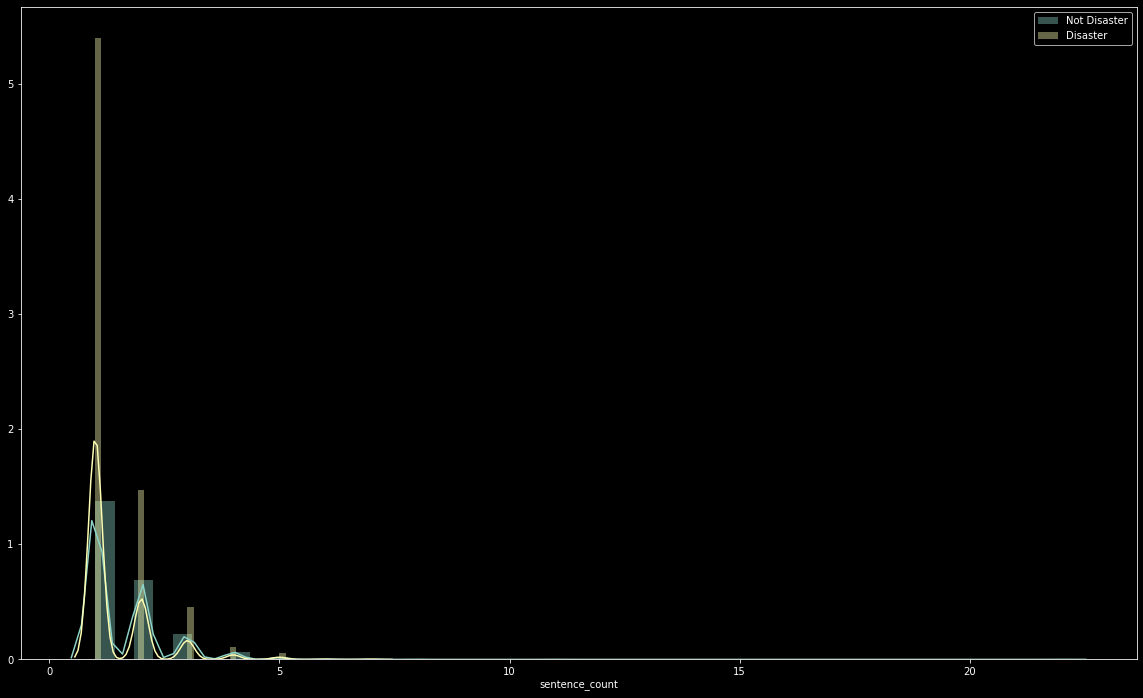

In [124]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train.loc[df_train['target'] == 0]['sentence_count'], label='Not Disaster', ax=ax)
sns.distplot(df_train.loc[df_train['target'] == 1]['sentence_count'], label='Disaster', ax=ax)
ax.legend()

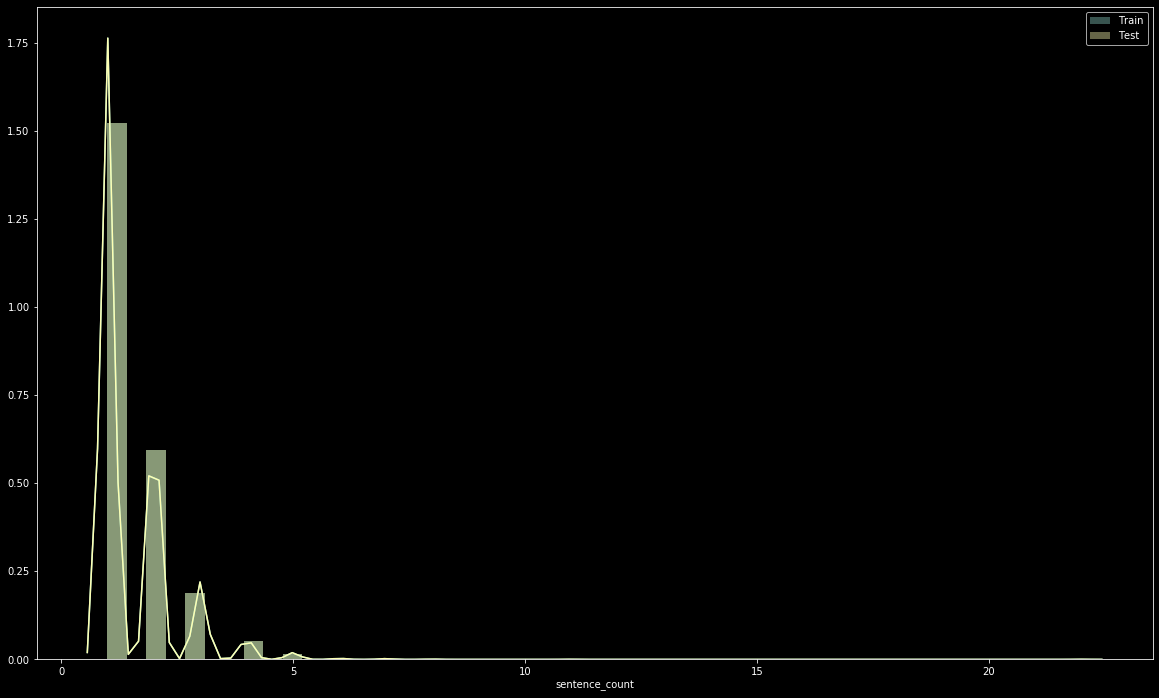

In [125]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train['sentence_count'], label='Train', ax=ax)
sns.distplot(df_train['sentence_count'], label='Test', ax=ax)
ax.legend()

In [126]:
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test['mean_word_length'] = df_test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_train.head(10)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,non_stop_word_count,url_count,hashtag_count,mention_count,char_count,punctuation_count,sentence_count,mean_word_length
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,7,0,1,0,69,1,1,4.384615
1,4,no%20keyword,no%20location,Forest fire near La Ronge Sask. Canada,1,7,7,0,7,0,0,0,38,1,2,4.571429
2,5,no%20keyword,no%20location,All residents asked to 'shelter in place' are ...,1,22,20,11,11,0,0,0,133,3,2,5.090909
3,6,no%20keyword,no%20location,"13,000 people receive #wildfires evacuation or...",1,8,8,1,7,0,1,0,65,2,1,7.125000
4,7,no%20keyword,no%20location,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,9,0,2,0,88,2,1,4.500000
5,8,no%20keyword,no%20location,#RockyFire Update => California Hwy. 20 closed...,1,18,18,3,15,0,3,0,110,7,2,5.166667
6,10,no%20keyword,no%20location,#flood #disaster Heavy rain causes flash flood...,1,14,14,2,12,0,2,0,95,3,1,5.857143
7,13,no%20keyword,no%20location,I'm on top of the hill and I can see a fire in...,1,15,14,10,5,0,0,0,59,4,1,3.000000
8,14,no%20keyword,no%20location,There's an emergency evacuation happening now ...,1,12,11,5,7,0,0,0,79,1,1,5.666667
9,15,no%20keyword,no%20location,I'm afraid that the tornado is coming to our a...,1,10,10,6,4,0,0,0,52,4,1,4.300000


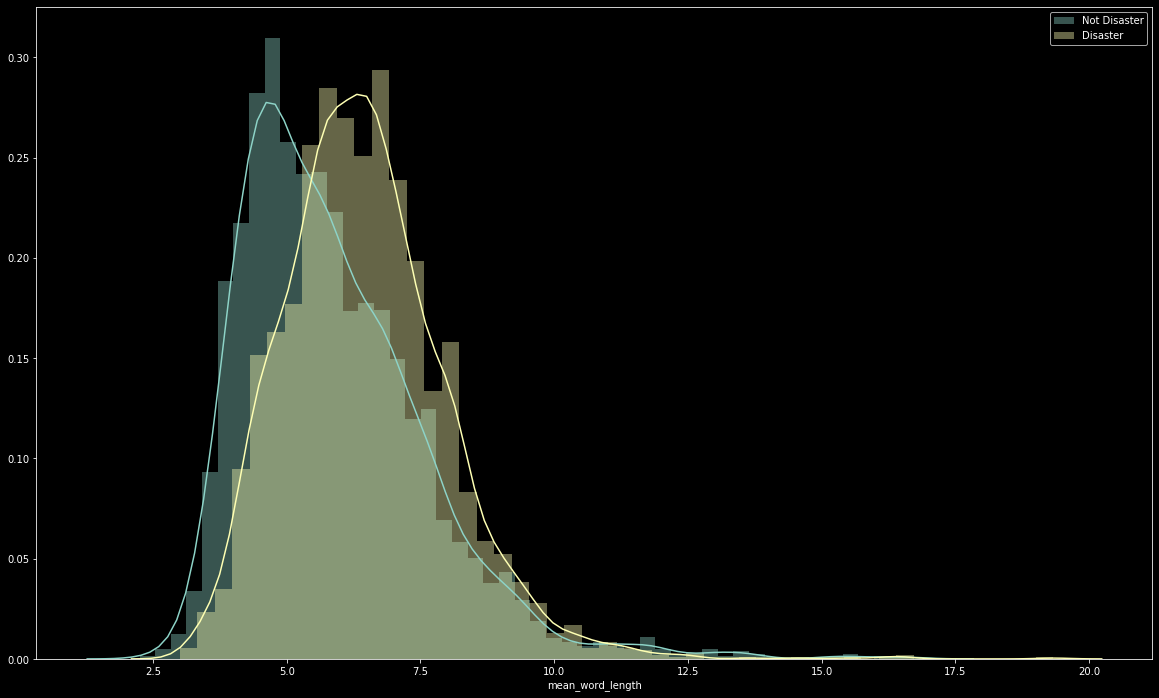

In [127]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train.loc[df_train['target'] == 0]['mean_word_length'], label='Not Disaster', ax=ax)
sns.distplot(df_train.loc[df_train['target'] == 1]['mean_word_length'], label='Disaster', ax=ax)
ax.legend()

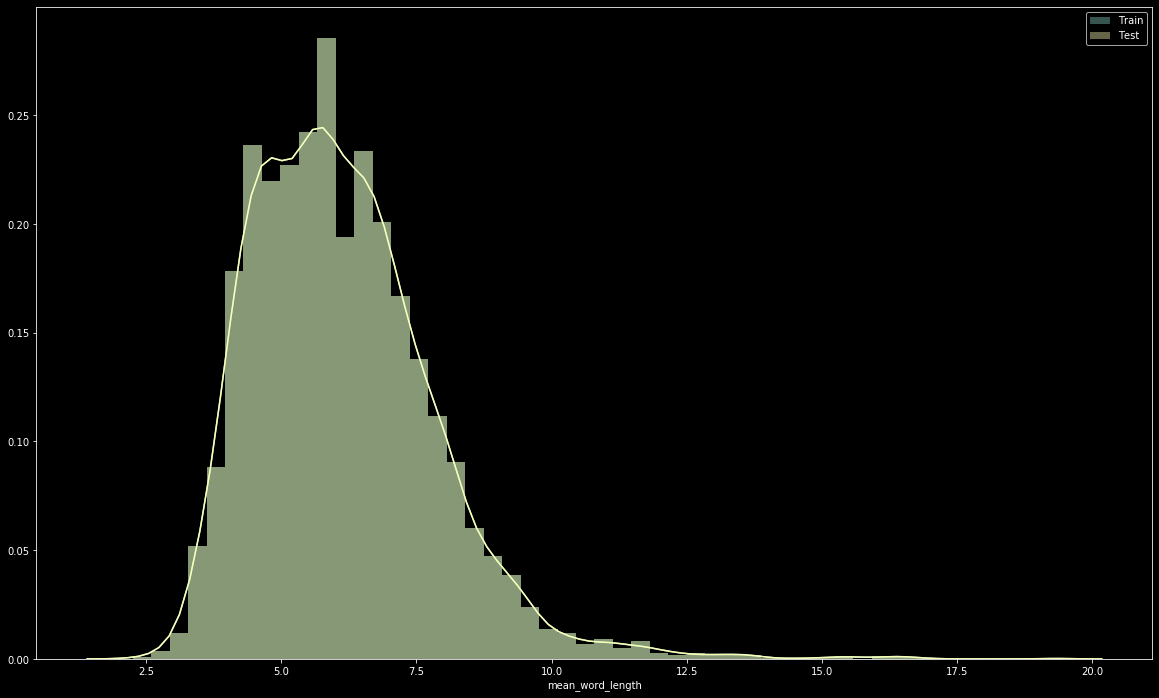

In [128]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train['mean_word_length'], label='Train', ax=ax)
sns.distplot(df_train['mean_word_length'], label='Test', ax=ax)
ax.legend()

In [133]:
df_train['mean_sentence_length'] = df_train['text'].apply(lambda x: np.mean([len(s) for s in sent_tokenize(x)]))
df_test['mean_sentence_length'] = df_test['text'].apply(lambda x: np.mean([len(s) for s in sent_tokenize(x)]))
df_train.head(10)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,non_stop_word_count,url_count,hashtag_count,mention_count,char_count,punctuation_count,sentence_count,mean_word_length,mean_sentence_length
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,7,0,1,0,69,1,1,4.384615,69.0
1,4,no%20keyword,no%20location,Forest fire near La Ronge Sask. Canada,1,7,7,0,7,0,0,0,38,1,2,4.571429,18.5
2,5,no%20keyword,no%20location,All residents asked to 'shelter in place' are ...,1,22,20,11,11,0,0,0,133,3,2,5.090909,66.0
3,6,no%20keyword,no%20location,"13,000 people receive #wildfires evacuation or...",1,8,8,1,7,0,1,0,65,2,1,7.125000,64.0
4,7,no%20keyword,no%20location,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,9,0,2,0,88,2,1,4.500000,87.0
5,8,no%20keyword,no%20location,#RockyFire Update => California Hwy. 20 closed...,1,18,18,3,15,0,3,0,110,7,2,5.166667,54.5
6,10,no%20keyword,no%20location,#flood #disaster Heavy rain causes flash flood...,1,14,14,2,12,0,2,0,95,3,1,5.857143,95.0
7,13,no%20keyword,no%20location,I'm on top of the hill and I can see a fire in...,1,15,14,10,5,0,0,0,59,4,1,3.000000,59.0
8,14,no%20keyword,no%20location,There's an emergency evacuation happening now ...,1,12,11,5,7,0,0,0,79,1,1,5.666667,79.0
9,15,no%20keyword,no%20location,I'm afraid that the tornado is coming to our a...,1,10,10,6,4,0,0,0,52,4,1,4.300000,52.0


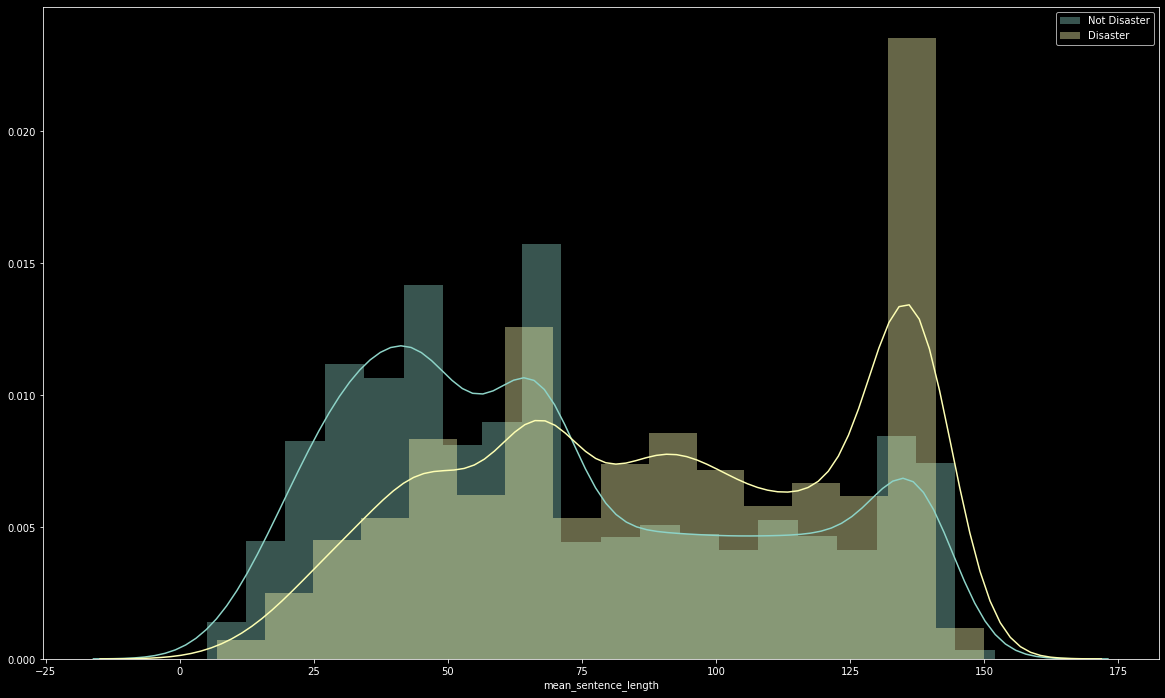

In [134]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train.loc[df_train['target'] == 0]['mean_sentence_length'], label='Not Disaster', ax=ax)
sns.distplot(df_train.loc[df_train['target'] == 1]['mean_sentence_length'], label='Disaster', ax=ax)
ax.legend()

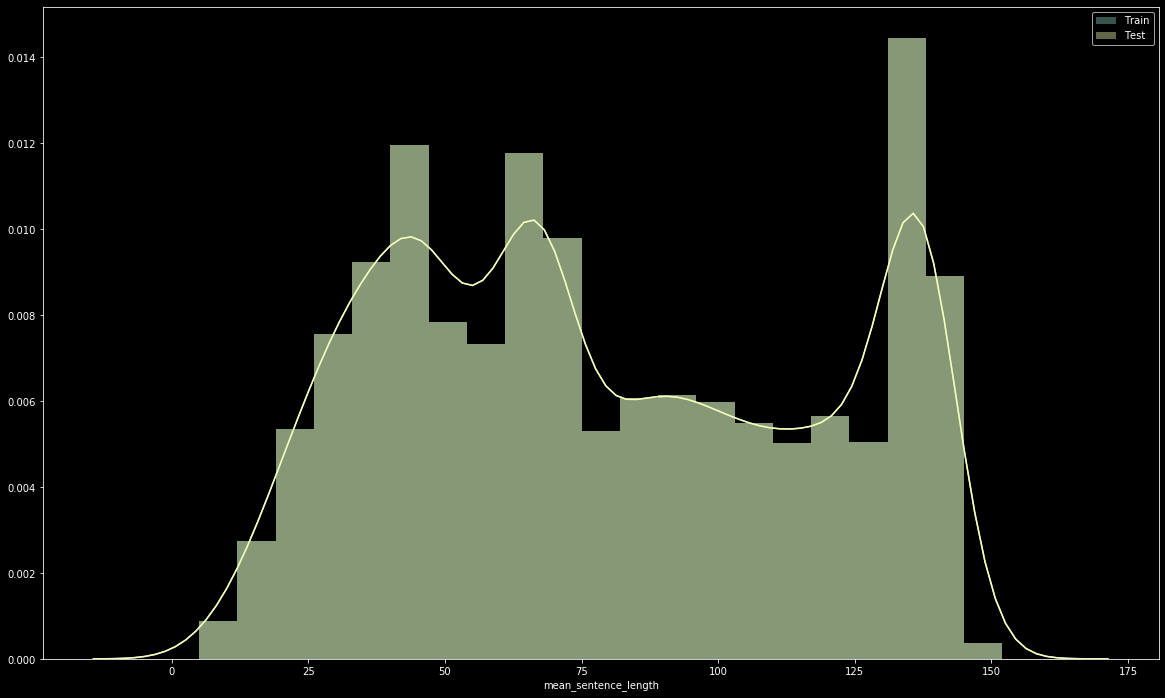

In [135]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train['mean_sentence_length'], label='Train', ax=ax)
sns.distplot(df_train['mean_sentence_length'], label='Test', ax=ax)
ax.legend()

In [136]:
def is_number(x):
    try:
        int(x)
        return True
    except ValueError:
        return False

In [137]:
df_train['number_count'] = df_train['text'].apply(lambda x: np.sum([is_number(w) for w in str(x).split()]))
df_test['number_count'] = df_test['text'].apply(lambda x: np.sum([is_number(w) for w in str(x).split()]))
df_train.head(10)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,non_stop_word_count,url_count,hashtag_count,mention_count,char_count,punctuation_count,sentence_count,mean_word_length,mean_sentence_length,number_count
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,7,0,1,0,69,1,1,4.384615,69.0,0
1,4,no%20keyword,no%20location,Forest fire near La Ronge Sask. Canada,1,7,7,0,7,0,0,0,38,1,2,4.571429,18.5,0
2,5,no%20keyword,no%20location,All residents asked to 'shelter in place' are ...,1,22,20,11,11,0,0,0,133,3,2,5.090909,66.0,0
3,6,no%20keyword,no%20location,"13,000 people receive #wildfires evacuation or...",1,8,8,1,7,0,1,0,65,2,1,7.125000,64.0,0
4,7,no%20keyword,no%20location,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,9,0,2,0,88,2,1,4.500000,87.0,0
5,8,no%20keyword,no%20location,#RockyFire Update => California Hwy. 20 closed...,1,18,18,3,15,0,3,0,110,7,2,5.166667,54.5,1
6,10,no%20keyword,no%20location,#flood #disaster Heavy rain causes flash flood...,1,14,14,2,12,0,2,0,95,3,1,5.857143,95.0,0
7,13,no%20keyword,no%20location,I'm on top of the hill and I can see a fire in...,1,15,14,10,5,0,0,0,59,4,1,3.000000,59.0,0
8,14,no%20keyword,no%20location,There's an emergency evacuation happening now ...,1,12,11,5,7,0,0,0,79,1,1,5.666667,79.0,0
9,15,no%20keyword,no%20location,I'm afraid that the tornado is coming to our a...,1,10,10,6,4,0,0,0,52,4,1,4.300000,52.0,0


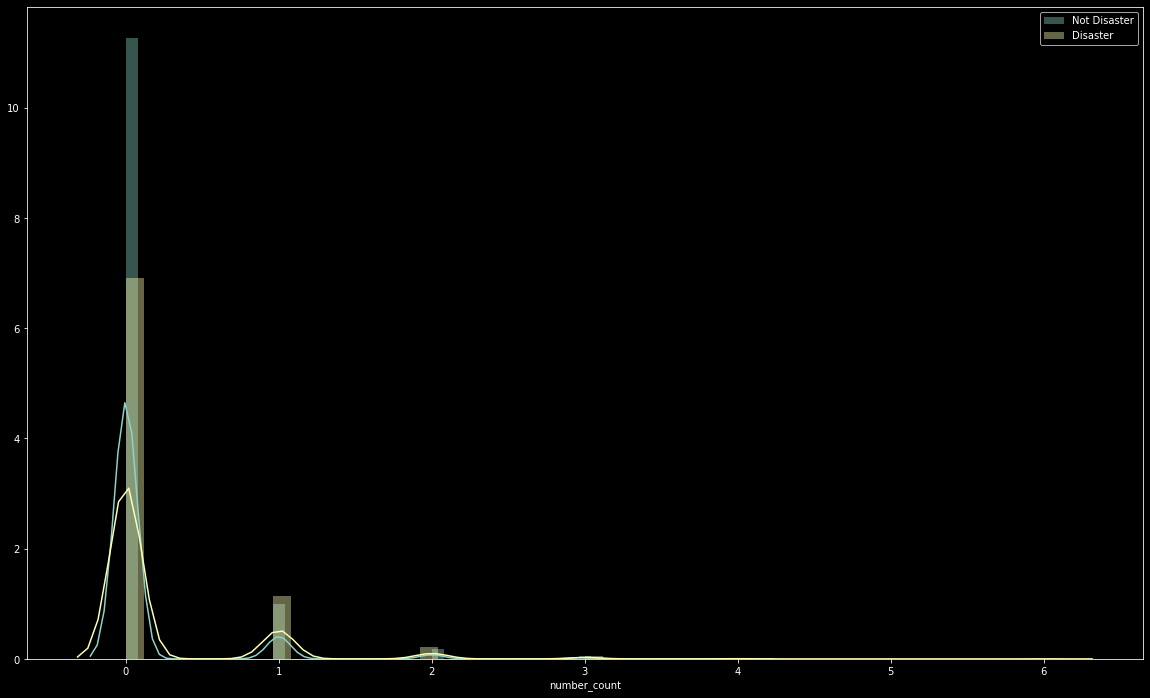

In [138]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train.loc[df_train['target'] == 0]['number_count'], label='Not Disaster', ax=ax)
sns.distplot(df_train.loc[df_train['target'] == 1]['number_count'], label='Disaster', ax=ax)
ax.legend()

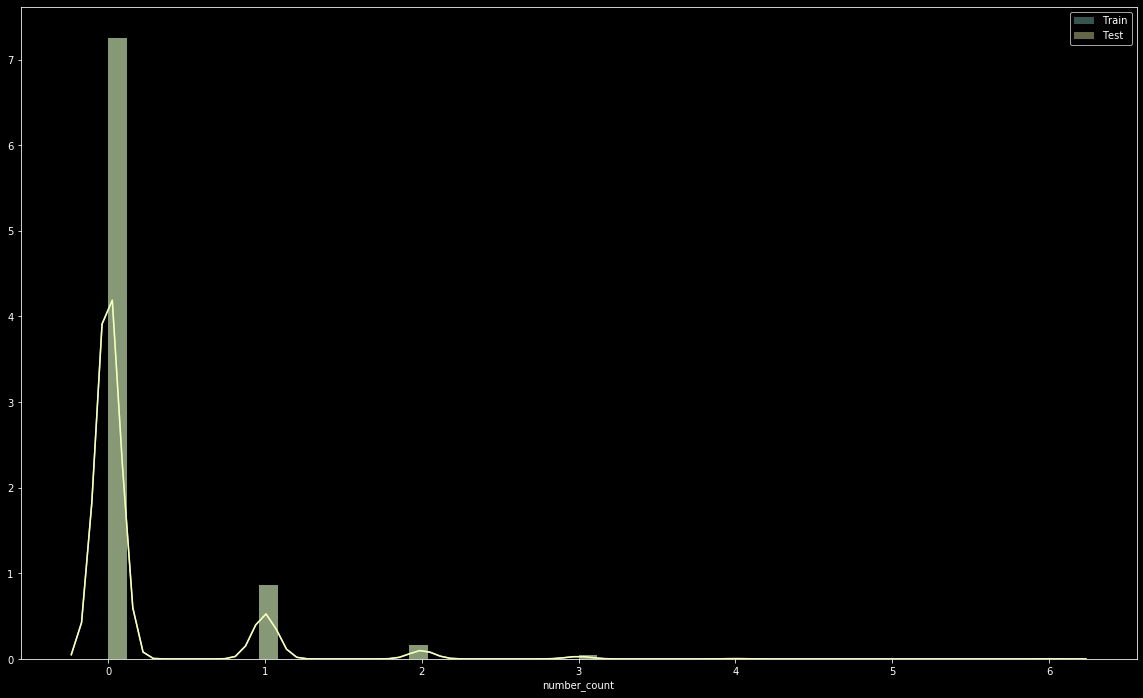

In [139]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train['number_count'], label='Train', ax=ax)
sns.distplot(df_train['number_count'], label='Test', ax=ax)
ax.legend()

In [143]:
# https://stackoverflow.com/a/34682849
def untokenize(words):
    """Untokenizing a text undoes the tokenizing operation, restoring
    punctuation and spaces to the places that people expect them to be.
    Ideally, `untokenize(tokenize(text))` should be identical to `text`,
    except for line breaks.
    """
    text = ' '.join(words)
    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .', '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
        "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()

In [144]:
# https://stackoverflow.com/a/47091490
def decontracted(phrase):
    """Convert contractions like "can't" into "can not"
    """
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    #phrase = re.sub(r"n't", " not", phrase) # resulted in "ca not" when sentence started with "can't"
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [165]:
# https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt
slang_abbrev_dict = {
    'AFAIK': 'As Far As I Know',
    'AFK': 'Away From Keyboard',
    'ASAP': 'As Soon As Possible',
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'BRB': 'Be Right Back',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'B4': 'Before',
    'B4N': 'Bye For Now',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FAQ': 'Frequently Asked Questions',
    'FC': 'Fingers Crossed',
    'FWIW': 'For What It\'s Worth',
    'FYI': 'For Your Information',
    'GAL': 'Get A Life',
    'GG': 'Good Game',
    'GN': 'Good Night',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek you',
    'ILU': 'I Love You',
    'IMHO': 'In My Humble Opinion',
    'IMO': 'In My Opinion',
    'IOW': 'In Other Words',
    'IRL': 'In Real Life',
    'KISS': 'Keep It Simple, Stupid',
    'LDR': 'Long Distance Relationship',
    'LMAO': 'Laugh My Ass Off',
    'LOL': 'Laughing Out Loud',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'OMG': 'Oh My God',
    'PITA': 'Pain In The Ass',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA?': 'Que Pasa?',
    'ROFL': 'Rolling On The Floor Laughing',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My Ass Off',
    'SK8': 'Skate',
    'STATS': 'Your sex and age',
    'ASL': 'Age, Sex, Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'TTYL': 'Talk To You Later',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The Fuck',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait',
    '7K': 'Sick:-D Laugher'
}

def unslang(text):
    """Converts text like "OMG" into "Oh my God"
    """
    if text.upper() in slang_abbrev_dict.keys():
        return slang_abbrev_dict[text.upper()]
    else:
        return text
    
def is_slang(text):
    if text.upper() in slang_abbrev_dict.keys():
        return True
    return False

In [169]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def is_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE)
    if emoji_pattern.match(text):
        return True
    return False

In [148]:
def clean(reg_exp, text):
    text = re.sub(reg_exp, " ", text)

    # replace multiple spaces with one.
    text = re.sub('\s{2,}', ' ', text)

    return text

def remove_urls(text):
    text = clean(r"http\S+", text)
    text = clean(r"www\S+", text)
    text = clean(r"pic.twitter.com\S+", text)

    return text

In [149]:
def clean_all(t):
    # first do bulk cleanup on tokens that don't depend on word tokenization
    # remove xml tags
    t = clean(r"<[^>]+>", t)
    t = clean(r"&lt;", t)
    t = clean(r"&gt;", t)
    # remove URLs
    t = remove_urls(t)
    # https://stackoverflow.com/a/35041925
    # replace multiple punctuation with single. Ex: !?!?!? would become ?
    t = clean(r'[\?\.\!]+(?=[\?\.\!])', t)
    t = remove_emoji(t)
    # expand common contractions like "I'm" "he'll"
    t = decontracted(t)
    # now remove/expand bad patterns per word
    words = word_tokenize(t)
    clean_words = []
    for w in words:
        # normalize punctuation
        w = re.sub(r'&', 'and', w)
        # expand slang like OMG = Oh my God
        w = unslang(w)        
        clean_words.append(w)
    # join the words back into a full string
    t = untokenize(clean_words)
    # finally, remove any non ascii and special characters that made it through
    t = clean(r"[^A-Za-z0-9\.\'!\?,\$]", t)
    return t

In [156]:
df_train['clean_text'] = df_train['text'].apply(lambda x: clean_all(x))
df_test['clean_text'] = df_test['text'].apply(lambda x: clean_all(x))
df_train.head(10)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,non_stop_word_count,url_count,hashtag_count,mention_count,char_count,punctuation_count,sentence_count,mean_word_length,mean_sentence_length,number_count,clean_text
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,7,0,1,0,69,1,1,4.384615,69.0,0,Our Deeds are the Reason of this earthquake Ma...
1,4,no%20keyword,no%20location,Forest fire near La Ronge Sask. Canada,1,7,7,0,7,0,0,0,38,1,2,4.571429,18.5,0,Forest fire near La Ronge Sask. Canada
2,5,no%20keyword,no%20location,All residents asked to 'shelter in place' are ...,1,22,20,11,11,0,0,0,133,3,2,5.090909,66.0,0,All residents asked to ishelter in place' are ...
3,6,no%20keyword,no%20location,"13,000 people receive #wildfires evacuation or...",1,8,8,1,7,0,1,0,65,2,1,7.125000,64.0,0,"13,000 people receive wildfires evacuation ord..."
4,7,no%20keyword,no%20location,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,9,0,2,0,88,2,1,4.500000,87.0,0,Just got sent this photo from Ruby Alaska as s...
5,8,no%20keyword,no%20location,#RockyFire Update => California Hwy. 20 closed...,1,18,18,3,15,0,3,0,110,7,2,5.166667,54.5,1,RockyFire Update California Hwy. 20 closed in...
6,10,no%20keyword,no%20location,#flood #disaster Heavy rain causes flash flood...,1,14,14,2,12,0,2,0,95,3,1,5.857143,95.0,0,flood disaster Heavy rain causes flash floodi...
7,13,no%20keyword,no%20location,I'm on top of the hill and I can see a fire in...,1,15,14,10,5,0,0,0,59,4,1,3.000000,59.0,0,I am on top of the hill and I can see a fire i...
8,14,no%20keyword,no%20location,There's an emergency evacuation happening now ...,1,12,11,5,7,0,0,0,79,1,1,5.666667,79.0,0,There is an emergency evacuation happening now...
9,15,no%20keyword,no%20location,I'm afraid that the tornado is coming to our a...,1,10,10,6,4,0,0,0,52,4,1,4.300000,52.0,0,I am afraid that the tornado is coming to our ...


In [158]:
spell = SpellChecker()
def typos(text):
    misspelled_words = spell.unknown(text.split())
    return misspelled_words

In [159]:
df_train['typo_count'] = df_train['clean_text'].apply(lambda x: len(typos(x)))
df_test['typo_count'] = df_test['clean_text'].apply(lambda x: len(typos(x)))
df_train.head(10)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,non_stop_word_count,url_count,hashtag_count,mention_count,char_count,punctuation_count,sentence_count,mean_word_length,mean_sentence_length,number_count,clean_text,typo_count
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,7,0,1,0,69,1,1,4.384615,69.0,0,Our Deeds are the Reason of this earthquake Ma...,0
1,4,no%20keyword,no%20location,Forest fire near La Ronge Sask. Canada,1,7,7,0,7,0,0,0,38,1,2,4.571429,18.5,0,Forest fire near La Ronge Sask. Canada,2
2,5,no%20keyword,no%20location,All residents asked to 'shelter in place' are ...,1,22,20,11,11,0,0,0,133,3,2,5.090909,66.0,0,All residents asked to ishelter in place' are ...,3
3,6,no%20keyword,no%20location,"13,000 people receive #wildfires evacuation or...",1,8,8,1,7,0,1,0,65,2,1,7.125000,64.0,0,"13,000 people receive wildfires evacuation ord...",2
4,7,no%20keyword,no%20location,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,9,0,2,0,88,2,1,4.500000,87.0,0,Just got sent this photo from Ruby Alaska as s...,1
5,8,no%20keyword,no%20location,#RockyFire Update => California Hwy. 20 closed...,1,18,18,3,15,0,3,0,110,7,2,5.166667,54.5,1,RockyFire Update California Hwy. 20 closed in...,4
6,10,no%20keyword,no%20location,#flood #disaster Heavy rain causes flash flood...,1,14,14,2,12,0,2,0,95,3,1,5.857143,95.0,0,flood disaster Heavy rain causes flash floodi...,1
7,13,no%20keyword,no%20location,I'm on top of the hill and I can see a fire in...,1,15,14,10,5,0,0,0,59,4,1,3.000000,59.0,0,I am on top of the hill and I can see a fire i...,1
8,14,no%20keyword,no%20location,There's an emergency evacuation happening now ...,1,12,11,5,7,0,0,0,79,1,1,5.666667,79.0,0,There is an emergency evacuation happening now...,0
9,15,no%20keyword,no%20location,I'm afraid that the tornado is coming to our a...,1,10,10,6,4,0,0,0,52,4,1,4.300000,52.0,0,I am afraid that the tornado is coming to our ...,1


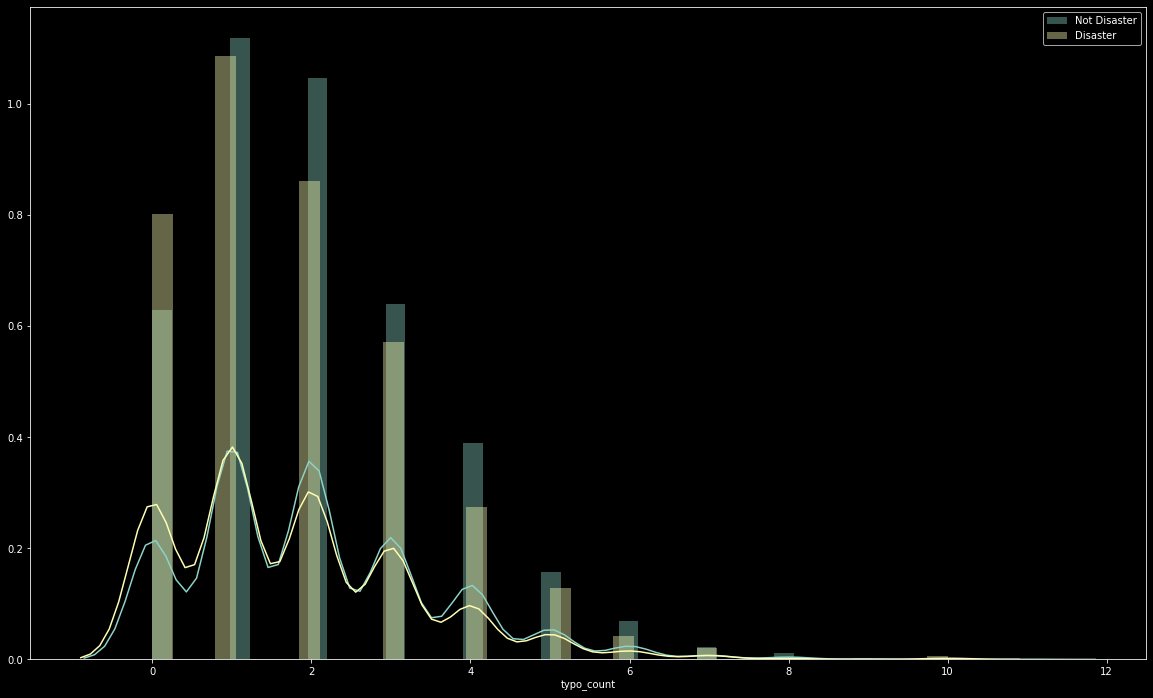

In [163]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train.loc[df_train['target'] == 0]['typo_count'], label='Not Disaster', ax=ax)
sns.distplot(df_train.loc[df_train['target'] == 1]['typo_count'], label='Disaster', ax=ax)
ax.legend()

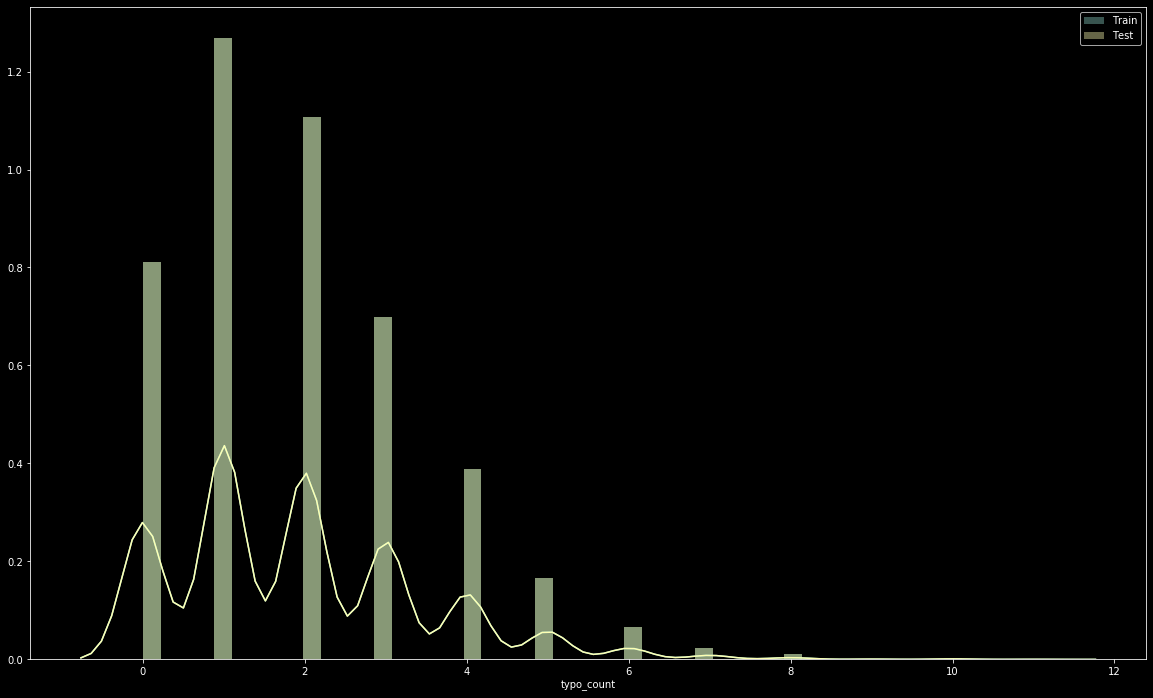

In [164]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train['typo_count'], label='Train', ax=ax)
sns.distplot(df_train['typo_count'], label='Test', ax=ax)
ax.legend()

In [166]:
df_train['slang_count'] = df_train['text'].apply(lambda x: np.sum([is_slang(w) for w in str(x).split()]))
df_test['slang_count'] = df_test['text'].apply(lambda x: np.sum([is_slang(w) for w in str(x).split()]))
df_train.head(10)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,non_stop_word_count,url_count,...,mention_count,char_count,punctuation_count,sentence_count,mean_word_length,mean_sentence_length,number_count,clean_text,typo_count,slang_count
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,7,0,...,0,69,1,1,4.384615,69.0,0,Our Deeds are the Reason of this earthquake Ma...,0,0
1,4,no%20keyword,no%20location,Forest fire near La Ronge Sask. Canada,1,7,7,0,7,0,...,0,38,1,2,4.571429,18.5,0,Forest fire near La Ronge Sask. Canada,2,0
2,5,no%20keyword,no%20location,All residents asked to 'shelter in place' are ...,1,22,20,11,11,0,...,0,133,3,2,5.090909,66.0,0,All residents asked to ishelter in place' are ...,3,0
3,6,no%20keyword,no%20location,"13,000 people receive #wildfires evacuation or...",1,8,8,1,7,0,...,0,65,2,1,7.125000,64.0,0,"13,000 people receive wildfires evacuation ord...",2,0
4,7,no%20keyword,no%20location,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,9,0,...,0,88,2,1,4.500000,87.0,0,Just got sent this photo from Ruby Alaska as s...,1,0
5,8,no%20keyword,no%20location,#RockyFire Update => California Hwy. 20 closed...,1,18,18,3,15,0,...,0,110,7,2,5.166667,54.5,1,RockyFire Update California Hwy. 20 closed in...,4,0
6,10,no%20keyword,no%20location,#flood #disaster Heavy rain causes flash flood...,1,14,14,2,12,0,...,0,95,3,1,5.857143,95.0,0,flood disaster Heavy rain causes flash floodi...,1,0
7,13,no%20keyword,no%20location,I'm on top of the hill and I can see a fire in...,1,15,14,10,5,0,...,0,59,4,1,3.000000,59.0,0,I am on top of the hill and I can see a fire i...,1,0
8,14,no%20keyword,no%20location,There's an emergency evacuation happening now ...,1,12,11,5,7,0,...,0,79,1,1,5.666667,79.0,0,There is an emergency evacuation happening now...,0,0
9,15,no%20keyword,no%20location,I'm afraid that the tornado is coming to our a...,1,10,10,6,4,0,...,0,52,4,1,4.300000,52.0,0,I am afraid that the tornado is coming to our ...,1,0


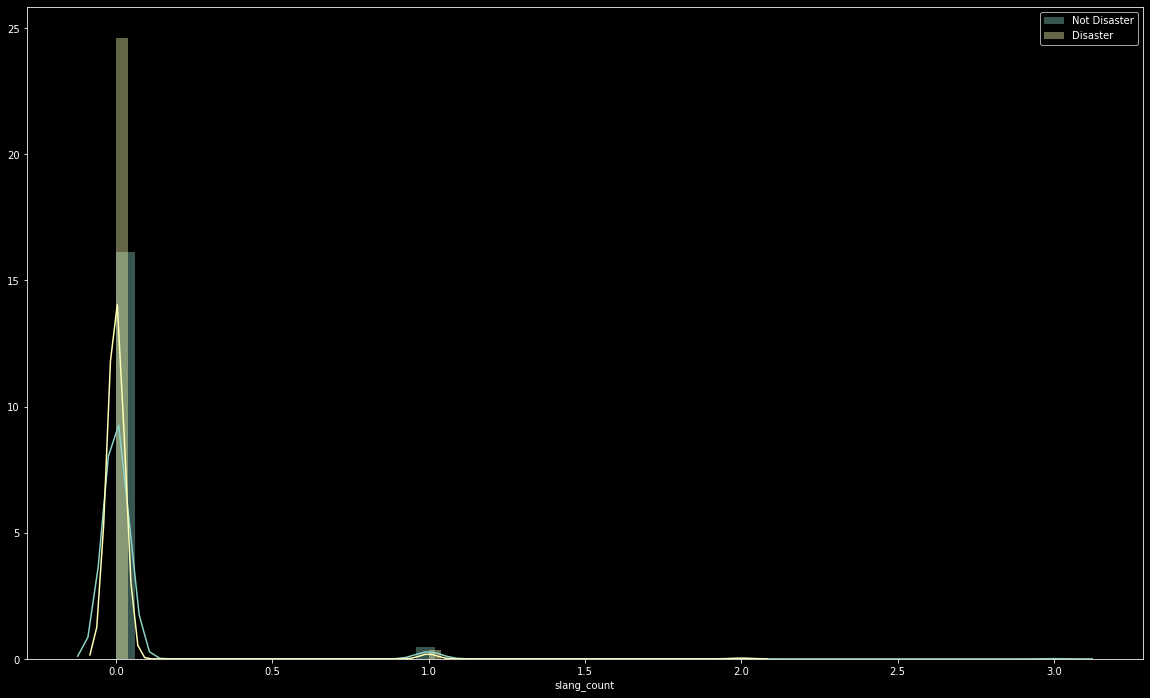

In [167]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train.loc[df_train['target'] == 0]['slang_count'], label='Not Disaster', ax=ax)
sns.distplot(df_train.loc[df_train['target'] == 1]['slang_count'], label='Disaster', ax=ax)
ax.legend()

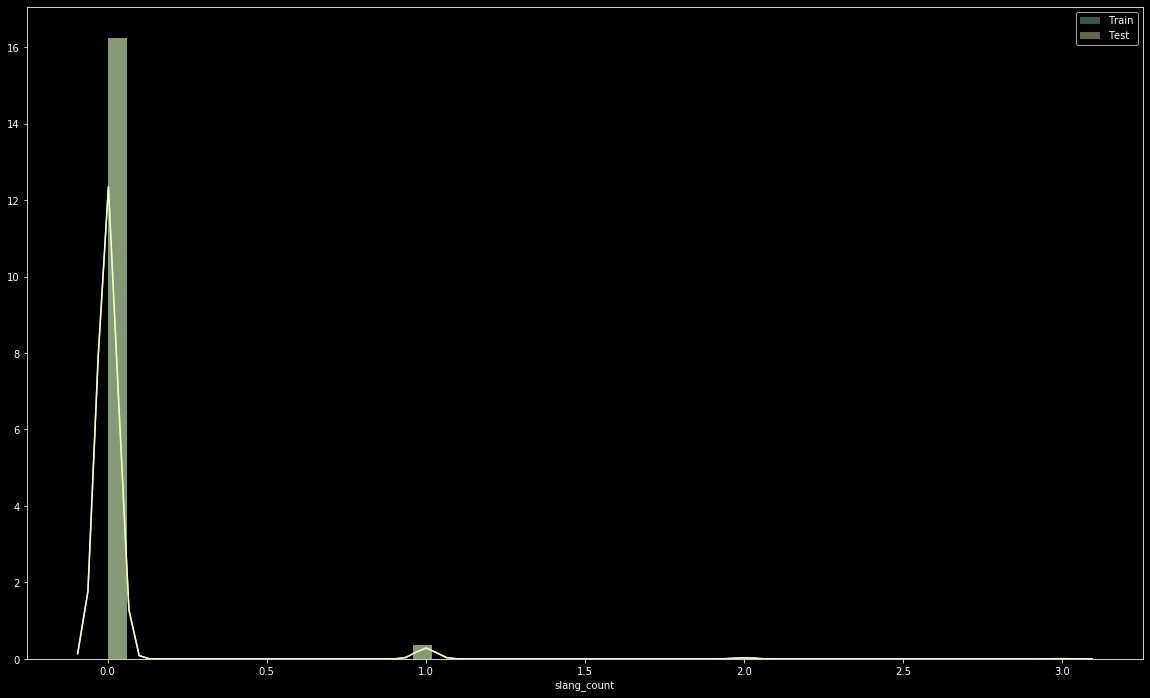

In [168]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_train['slang_count'], label='Train', ax=ax)
sns.distplot(df_train['slang_count'], label='Test', ax=ax)
ax.legend()

In [170]:
df_train['emoji_count'] = df_train['text'].apply(lambda x: np.sum([is_emoji(w) for w in str(x).split()]))
df_test['emoji_count'] = df_test['text'].apply(lambda x: np.sum([is_emoji(w) for w in str(x).split()]))
df_train.head(10)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,non_stop_word_count,url_count,...,char_count,punctuation_count,sentence_count,mean_word_length,mean_sentence_length,number_count,clean_text,typo_count,slang_count,emoji_count
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,7,0,...,69,1,1,4.384615,69.0,0,Our Deeds are the Reason of this earthquake Ma...,0,0,0
1,4,no%20keyword,no%20location,Forest fire near La Ronge Sask. Canada,1,7,7,0,7,0,...,38,1,2,4.571429,18.5,0,Forest fire near La Ronge Sask. Canada,2,0,0
2,5,no%20keyword,no%20location,All residents asked to 'shelter in place' are ...,1,22,20,11,11,0,...,133,3,2,5.090909,66.0,0,All residents asked to ishelter in place' are ...,3,0,0
3,6,no%20keyword,no%20location,"13,000 people receive #wildfires evacuation or...",1,8,8,1,7,0,...,65,2,1,7.125000,64.0,0,"13,000 people receive wildfires evacuation ord...",2,0,0
4,7,no%20keyword,no%20location,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,9,0,...,88,2,1,4.500000,87.0,0,Just got sent this photo from Ruby Alaska as s...,1,0,0
5,8,no%20keyword,no%20location,#RockyFire Update => California Hwy. 20 closed...,1,18,18,3,15,0,...,110,7,2,5.166667,54.5,1,RockyFire Update California Hwy. 20 closed in...,4,0,0
6,10,no%20keyword,no%20location,#flood #disaster Heavy rain causes flash flood...,1,14,14,2,12,0,...,95,3,1,5.857143,95.0,0,flood disaster Heavy rain causes flash floodi...,1,0,0
7,13,no%20keyword,no%20location,I'm on top of the hill and I can see a fire in...,1,15,14,10,5,0,...,59,4,1,3.000000,59.0,0,I am on top of the hill and I can see a fire i...,1,0,0
8,14,no%20keyword,no%20location,There's an emergency evacuation happening now ...,1,12,11,5,7,0,...,79,1,1,5.666667,79.0,0,There is an emergency evacuation happening now...,0,0,0
9,15,no%20keyword,no%20location,I'm afraid that the tornado is coming to our a...,1,10,10,6,4,0,...,52,4,1,4.300000,52.0,0,I am afraid that the tornado is coming to our ...,1,0,0


In [172]:
df_train.loc[df_train['target'] == 0]['emoji_count'].value_counts()

0    4342
Name: emoji_count, dtype: int64

In [174]:
df_train.loc[df_train['target'] == 1]['emoji_count'].value_counts()

0    3271
Name: emoji_count, dtype: int64

In [176]:
df_train.drop('emoji_count', axis=1, inplace=True)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,non_stop_word_count,url_count,...,mention_count,char_count,punctuation_count,sentence_count,mean_word_length,mean_sentence_length,number_count,clean_text,typo_count,slang_count
0,1,no%20keyword,no%20location,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,7,0,...,0,69,1,1,4.384615,69.0,0,Our Deeds are the Reason of this earthquake Ma...,0,0


In [178]:
df_train.to_csv('../input/train_extra_feat.csv', index=False)

In [179]:
df_test.to_csv('../input/test_extra_feat.csv', index=False)